<a href="https://colab.research.google.com/github/suman-rm/HealthCare-Disease-prediction-using-ML/blob/main/HealthCare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CLASSIFICATION PROBLEM : A HEALTH CARE-SYMPTOMS PREDICTION USING ML
It's the classification problem, predict the outcome of a binary event. In this project we are using "Training.csv" dataset to train the model. The dataset contains the symptoms as the input columns and prognosis as the output column.

Prognosis Case Study
Problem Statement: Consider a Diagnosis center that has a dataset containing the symptoms for different prognosis. It wishes to use the data to optimise the diagnosis based on important factors such as symptoms like itching,sunken_eyes,breathlessness,sweating,dehydration etc.

Essentially, the diagnosis center wants —

To identify the variables affecting prognosis like different symptoms.

To create a linear model that quantitatively relates prognosis with variables such as itching,sunken_eyes,breathlessness,sweating,dehydration etc.

To know the accuracy of the model, i.e. how well these variables can predict prognosis.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#connecting google colab with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading csv file

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Training.csv")
df.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

In [6]:
# let's inspect at the pandas type of object used to store the information

df.dtypes

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object

In [5]:
#checking if any null/NA present 
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

Conclusion: We see, there is no null value so no need to clean the data

In [7]:
df.groupby('prognosis').count()

itching  skin_rash  \
prognosis                                                     
(vertigo) Paroymsal  Positional Vertigo      120        120   
AIDS                                         120        120   
Acne                                         120        120   
Alcoholic hepatitis                          120        120   
Allergy                                      120        120   
Arthritis                                    120        120   
Bronchial Asthma                             120        120   
Cervical spondylosis                         120        120   
Chicken pox                                  120        120   
Chronic cholestasis                          120        120   
Common Cold                                  120        120   
Dengue                                       120        120   
Diabetes                                     120        120   
Dimorphic hemmorhoids(piles)                 120        120   
Drug Reaction                                120        120   
Fungal infection                             120        120   
GERD                                         120        120   
Gastroenteritis                              120        120   
Heart attack                                 120        120   
Hepatitis B                                  120        120   
Hepatitis C                                  120        120   
Hepatitis D                                  120        120   
Hepatitis E                                  120        120   
Hypertension                                 120        120   
Hyperthyroidism                              120        120   
Hypoglycemia                                 120        120   
Hypothyroidism                               120        120   
Impetigo                                     120        120   
Jaundice                                     120        120   
Malaria                                      120        120   
Migraine                                     120        120   
Osteoarthristis                              120        120   
Paralysis (brain hemorrhage)                 120        120   
Peptic ulcer diseae                          120        120   
Pneumonia                                    120        120   
Psoriasis                                    120        120   
Tuberculosis                                 120        120   
Typhoid                                      120        120   
Urinary tract infection                      120        120   
Varicose veins                               120        120   
hepatitis A                                  120        120   

                                         nodal_skin_eruptions  \
prognosis                                                       
(vertigo) Paroymsal  Positional Vertigo                   120   
AIDS                                                      120   
Acne                                                      120   
Alcoholic hepatitis                                       120   
Allergy                                                   120   
Arthritis                                                 120   
Bronchial Asthma                                          120   
Cervical spondylosis                                      120   
Chicken pox                                               120   
Chronic cholestasis                                       120   
Common Cold                                               120   
Dengue                                                    120   
Diabetes                                                  120   
Dimorphic hemmorhoids(piles)                              120   
Drug Reaction                                             120   
Fungal infection                                          120   
GERD                                                      120   
Gastroenteritis                                           120   
Heart attack                   

 Conclusion: The dataset is balanced, hence no need to add dummy variables.

## Performing EDA
### Here we are using Data cleaning, Data visualization and Data processing.

In [8]:
# displaying the shape
df.shape

(4920, 133)

In [9]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [10]:
#display the datatypes
df.dtypes

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object

Here we can analyze that, each input feature is of the integer type and output feature is a categorical type.
Hence we are applying encoding techniques for categorical values.

## Data processing

### Handling Categorical Variables

In [11]:
#prognosis column is a categorical one so we have to perform encoding methods
df['prognosis'] = df['prognosis'].astype('category')

In [12]:
encoded_prognosis = pd.get_dummies(df['prognosis'])

pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.

### Displaying the encoded values.

In [13]:
encoded_prognosis.head()

(vertigo) Paroymsal  Positional Vertigo  AIDS  Acne  Alcoholic hepatitis  \
0                                        0     0     0                    0   
1                                        0     0     0                    0   
2                                        0     0     0                    0   
3                                        0     0     0                    0   
4                                        0     0     0                    0   

   Allergy  Arthritis  Bronchial Asthma  Cervical spondylosis  Chicken pox  \
0        0          0                 0                     0            0   
1        0          0                 0                     0            0   
2        0          0                 0                     0            0   
3        0          0                 0                     0            0   
4        0          0                 0                     0            0   

   Chronic cholestasis  ...  Osteoarthristis  Paralysis (brain hemorrhage)  \
0                    0  ...                0                             0   
1                    0  ...                0                             0   
2                    0  ...                0                             0   
3                    0  ...                0                             0   
4                    0  ...                0                             0   

   Peptic ulcer diseae  Pneumonia  Psoriasis  Tuberculosis  Typhoid  \
0                    0          0          0             0        0   
1                    0          0          0             0        0   
2                    0          0          0             0        0   
3                    0          0          0             0        0   
4                    0          0          0             0        0   

   Urinary tract infection  Varicose veins  hepatitis A  
0                        0               0            0  
1                        0               0            0  
2                        0               0            0  
3                        0               0            0  
4                        0               0            0  

[5 rows x 41 columns]

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder = LabelEncoder()
df['prognosis'] = encoder.fit_transform(df['prognosis'])

In [16]:
df.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze  prognosis  
0                  0         15  
1                  0         15  
2                  0         15  
3                  0         15  
4                  0         15  

[5 rows x 133 columns]

In [17]:
#descibing the statistical values
df.describe()

itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       0.000000     0.000000     0.000000      0.000000     0.000000   
75%       0.000000     0.000000     0.000000      0.000000     0.000000   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

       ulcers_on_tongue  ...   blackheads     scurring  skin_peeling  \
count       4920.000000  ...  4920.000000  4920.000000   4920.000000   
mean           0.021951  ...     0.021951     0.021951      0.023171   
std            0.146539  ...     0.146539     0.146539      0.150461   
min            0.000000  ...     0.000000     0.000000      0.000000   
25%            0.000000  ...     0.000000     0.000000      0.000000   
50%            0.000000  ...     0.000000     0.000000      0.000000   
75%            0.000000  ...     0.000000     0.000000      0.000000   
max            1.000000  ...     1.000000     1.000000      1.000000   

       silver_like_dusting  small_dents_in_nails  inflammatory_nails  \
count          4920.000000           4920.000000         4920.000000   
mean              0.023171              0.023171            0.023171   
std               0.150461              0.150461            0.150461   
min               0.000000              0.000000            0.000000   
25%               0.000000              0.000000            0.000000   
50%               0.000000              0.000000            0.000000   
75%               0.000000              0.000000            0.000000   
max               1.000000              1.000000            1.000000   

           blister  red_sore_around_nose  yellow_crust_ooze    prognosis  
count  4920.000000           4920.000000        4920.000000  4920.000000  
mean      0.023171              0.023171           0.023171    20.000000  
std       0.150461              0.150461           0.150461    11.833362  
min       0.000000              0.000000           0.000000     0.000000  
25%       0.000000              0.000000           0.000000    10.000000  
50%       0.000000              0.000000           0.000000    20.000000  
75%       0.000000              0.000000           0.000000    30.000000  
max       1.000000              1.000000           1.000000    40.000000  

[8 rows x 133 columns]

 Conclusion: The count of all features is same that is balanced.
 The mean and std value is more for prognosis,fatigue,vomiting and high_fever.
    
            

In [18]:

#correlating the dataset features
df.corr()

itching  skin_rash  nodal_skin_eruptions  \
itching               1.000000   0.318158              0.326439   
skin_rash             0.318158   1.000000              0.298143   
nodal_skin_eruptions  0.326439   0.298143              1.000000   
continuous_sneezing  -0.086906  -0.094786             -0.032566   
shivering            -0.059893  -0.065324             -0.022444   
...                        ...        ...                   ...   
inflammatory_nails   -0.061573   0.331087             -0.023073   
blister              -0.061573   0.331087             -0.023073   
red_sore_around_nose -0.061573   0.331087             -0.023073   
yellow_crust_ooze    -0.061573   0.331087             -0.023073   
prognosis            -0.151898  -0.146564             -0.063307   

                      continuous_sneezing  shivering    chills  joint_pain  \
itching                         -0.086906  -0.059893 -0.175905   -0.160650   
skin_rash                       -0.094786  -0.065324 -0.029324    0.171134   
nodal_skin_eruptions            -0.032566  -0.022444 -0.065917   -0.060200   
continuous_sneezing              1.000000   0.608981  0.446238   -0.087351   
shivering                        0.608981   1.000000  0.295332   -0.060200   
...                                   ...        ...       ...         ...   
inflammatory_nails              -0.033480  -0.023073 -0.067765    0.359845   
blister                         -0.033480  -0.023073 -0.067765   -0.061889   
red_sore_around_nose            -0.033480  -0.023073 -0.067765   -0.061889   
yellow_crust_ooze               -0.033480  -0.023073 -0.067765   -0.061889   
prognosis                       -0.237346  -0.202584  0.120786    0.226410   

                      stomach_pain   acidity  ulcers_on_tongue  ...  \
itching                   0.202850 -0.086906         -0.059893  ...   
skin_rash                 0.161784 -0.094786         -0.065324  ...   
nodal_skin_eruptions     -0.032566 -0.032566         -0.022444  ...   
continuous_sneezing      -0.047254 -0.047254         -0.032566  ...   
shivering                -0.032566 -0.032566         -0.022444  ...   
...                            ...       ...               ...  ...   
inflammatory_nails       -0.033480 -0.033480         -0.023073  ...   
blister                  -0.033480 -0.033480         -0.023073  ...   
red_sore_around_nose     -0.033480 -0.033480         -0.023073  ...   
yellow_crust_ooze        -0.033480 -0.033480         -0.023073  ...   
prognosis                -0.091363  0.058592         -0.050646  ...   

                      blackheads  scurring  skin_peeling  silver_like_dusting  \
itching                -0.059893 -0.059893     -0.061573            -0.061573   
skin_rash               0.320859  0.320859      0.331087             0.331087   
nodal_skin_eruptions   -0.022444 -0.022444     -0.023073            -0.023073   
continuous_sneezing    -0.032566 -0.032566     -0.033480            -0.033480   
shivering              -0.022444 -0.022444     -0.023073            -0.023073   
...                          ...       ...           ...                  ...   
inflammatory_nails     -0.023073 -0.023073      0.946120             0.946120   
blister                -0.023073 -0.023073     -0.023720            -0.023720   
red_sore_around_nose   -0.023073 -0.023073     -0.023720            -0.023720   
yellow_crust_ooze      -0.023073 -0.023073     -0.023720            -0.023720   
prognosis              -0.227907 -0.227907      0.195249             0.195249   

                      small_dents_in_nails  inflammatory_nails   blister  \
itching                          -0.061573           -0.061573 -0.061573   
skin_rash                         0.331087            0.331087  0.331087   
nodal_skin_eruptions             -0.023073           -0.023073 -0.023073   
continuous_sneezing              -0.033480           -0.033480 -0.033480   
shivering                        -0.023073           -0.023073 -0.023073   

Conclusion: corr() is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For the output prognosis, mild_fever is more correlated one.

## Data visualization 

Exploring the range and distribution of numerical Variables

In [19]:
x=df.drop('prognosis',axis='columns')
y=df.prognosis

Plotting dishplot: distplot() function is used to plot the distplot. The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution. The seaborn. distplot() function accepts the data variable as an argument and returns the plot with the density distribution.

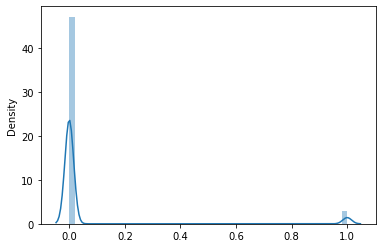

In [20]:
#dishplot of x
sns_plot = sns.distplot(x)

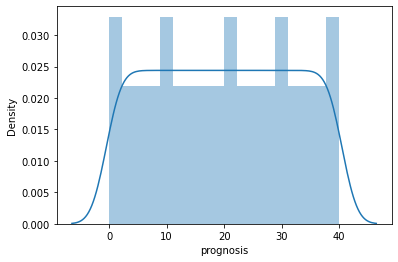

In [21]:
#dishplot of y
sns_plot = sns.distplot(df["prognosis"])

# Distributions of the variables/features

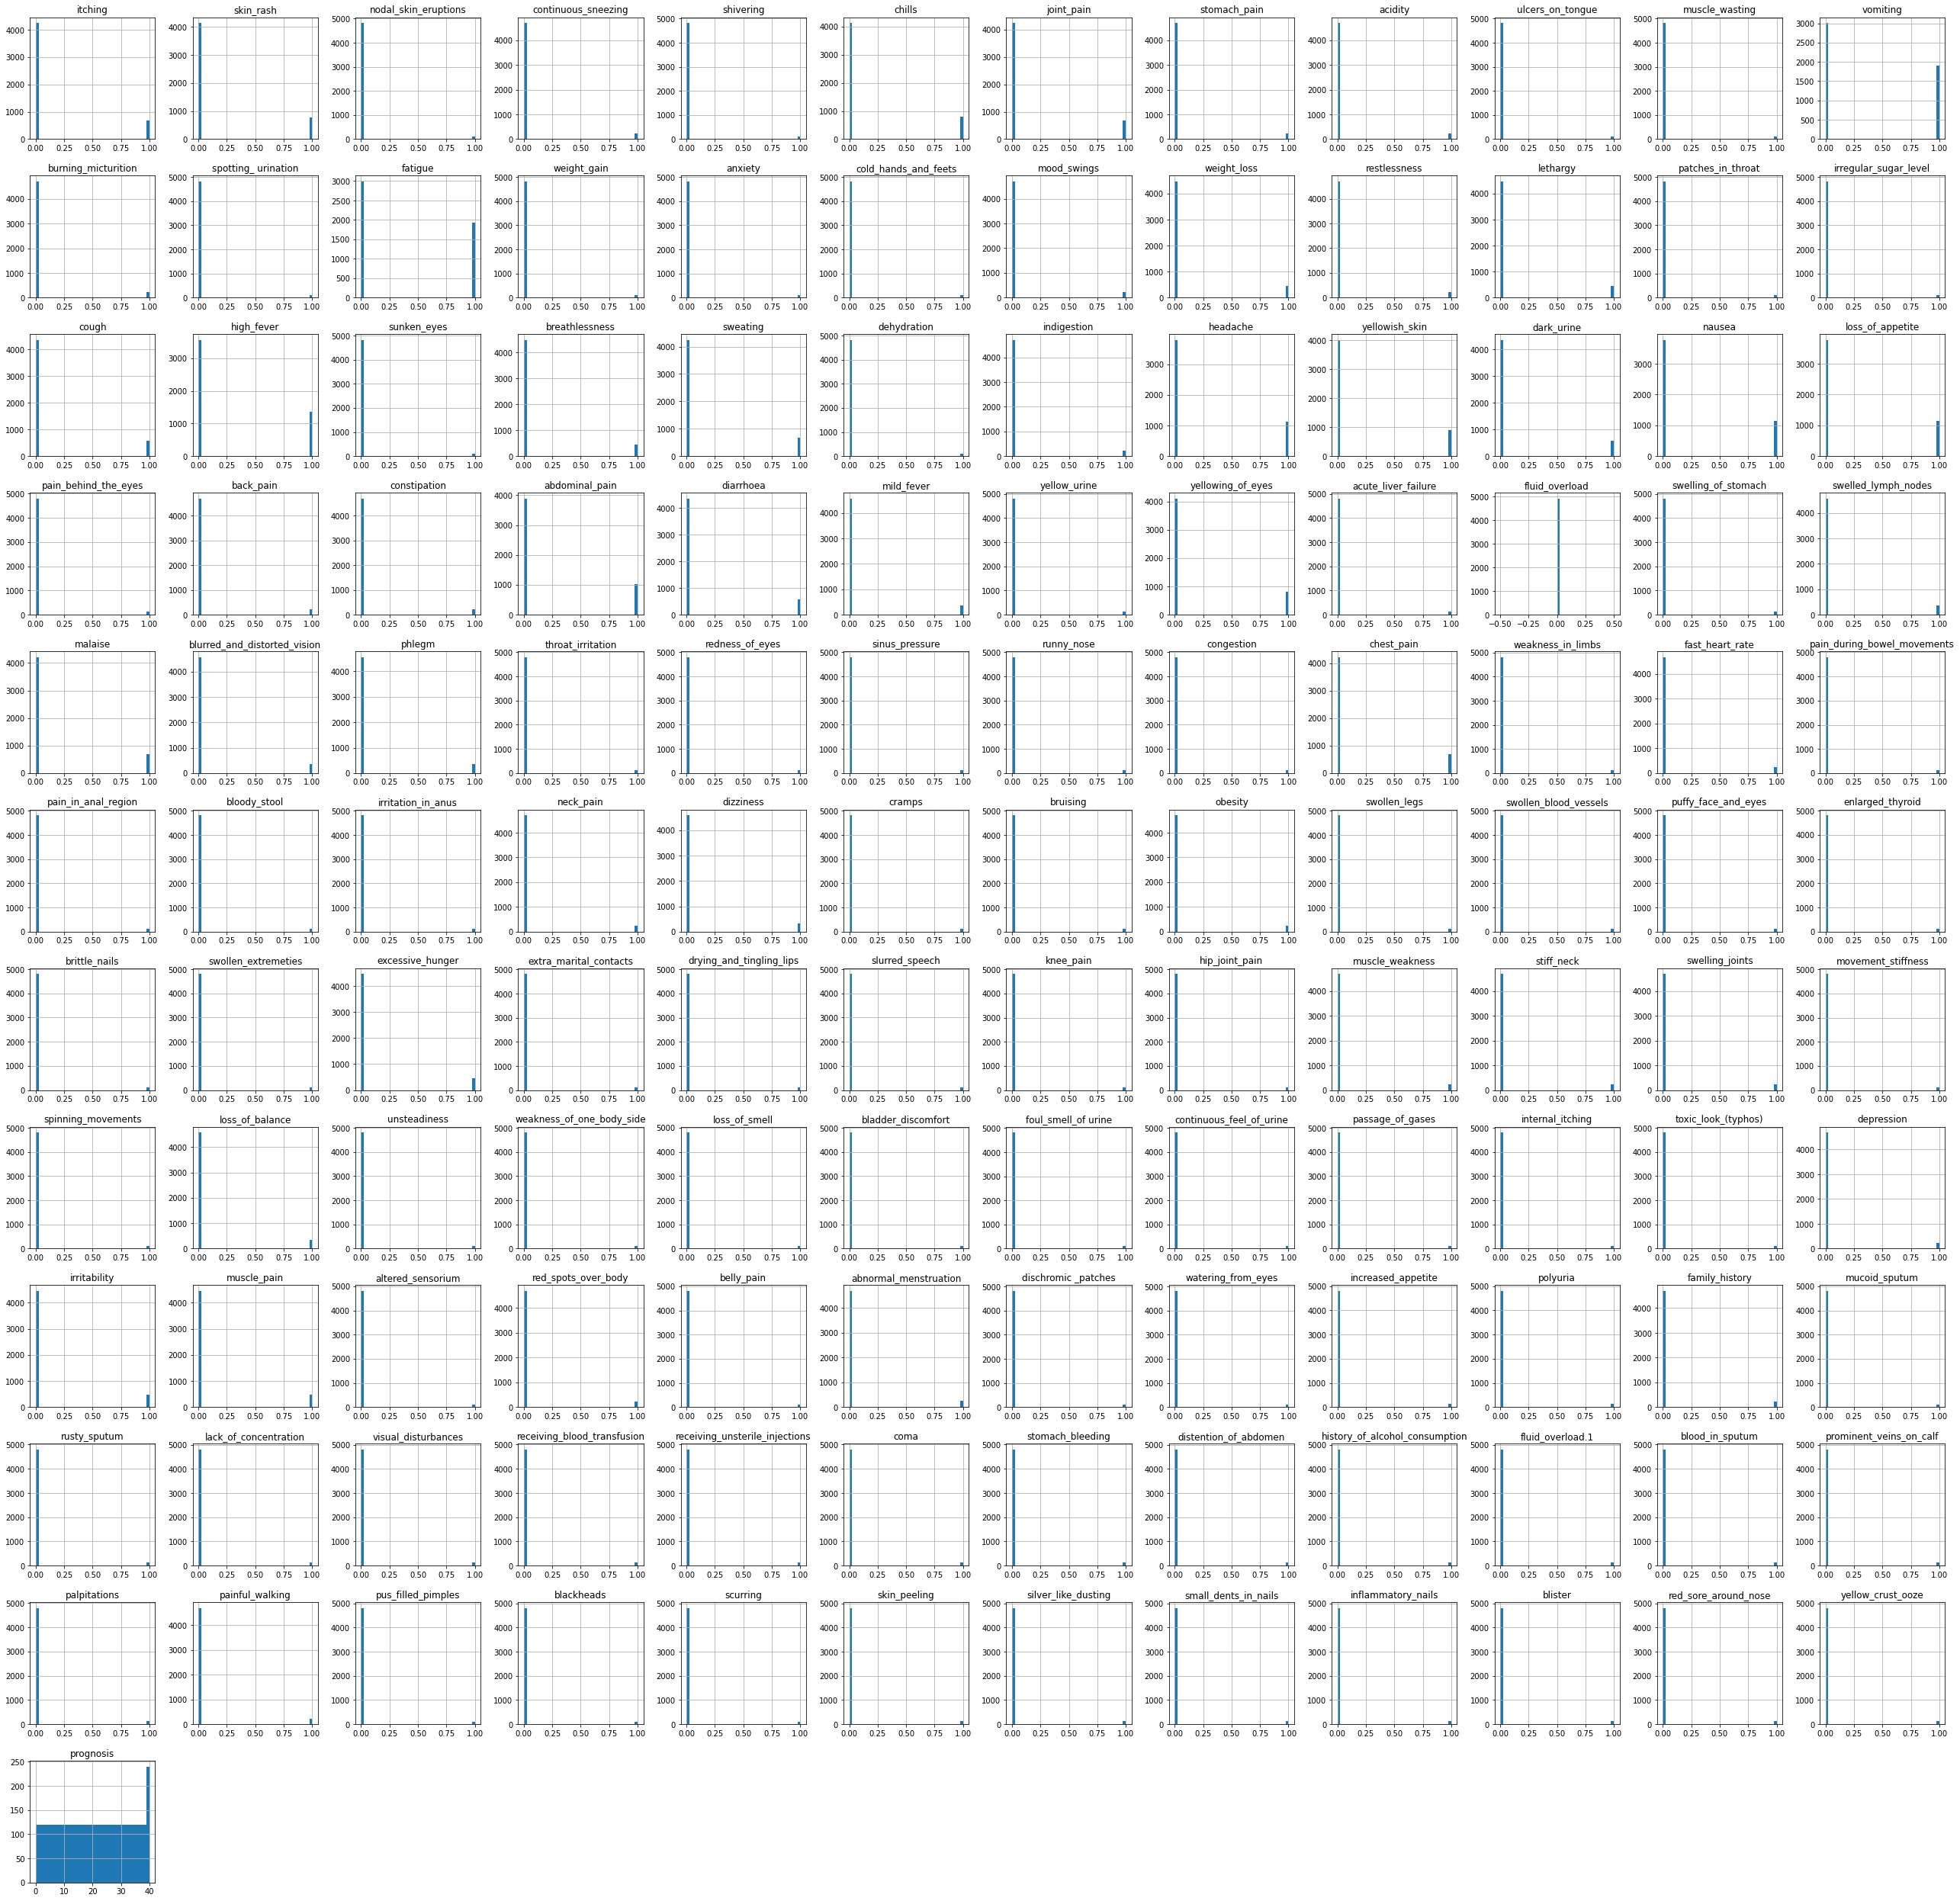

In [22]:
df.hist(figsize=(45,45),bins=40)
plt.show()

## Handling Outliers

Box plot: A box plot or boxplot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles

In [23]:
import seaborn as sns

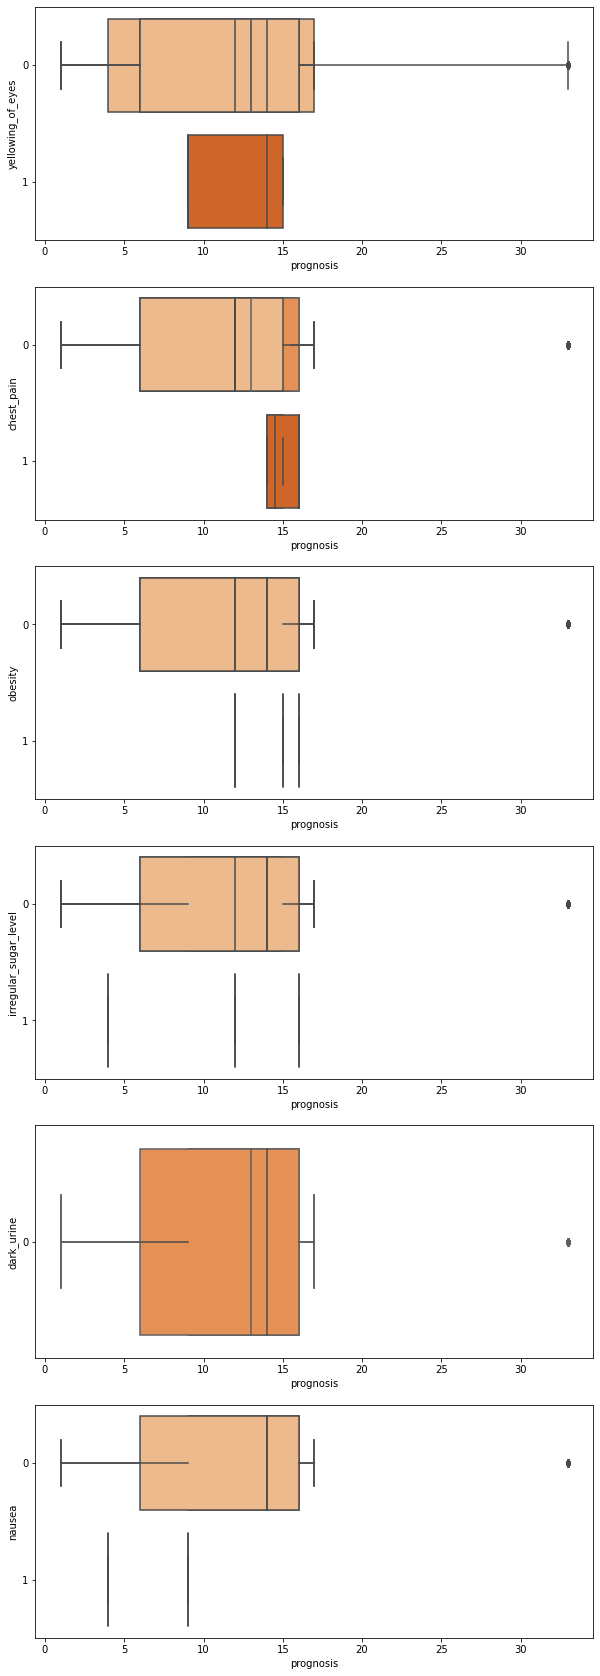

In [24]:
fig, axes = plt.subplots(nrows=6, ncols=1)
fig.set_size_inches(10, 30)
sns.boxplot(data=df.head(100), y='itching', x='prognosis', orient='h', ax=axes[0], palette='Oranges')
sns.boxplot(data=df.head(100), y='skin_rash', x='prognosis', orient='h', ax=axes[1], palette='Oranges')
sns.boxplot(data=df.head(100), y='nodal_skin_eruptions', x='prognosis', orient='h', ax=axes[2], palette='Oranges')
sns.boxplot(data=df.head(100), y='continuous_sneezing', x='prognosis', orient='h', ax=axes[3], palette='Oranges')
sns.boxplot(data=df.head(100), y='shivering', x='prognosis', orient='h', ax=axes[4], palette='Oranges')
sns.boxplot(data=df.head(100), y='chills', x='prognosis', orient='h', ax=axes[5], palette='Oranges')
sns.boxplot(data=df.head(100), y='joint_pain', x='prognosis', orient='h', ax=axes[0], palette='Oranges')
sns.boxplot(data=df.head(100), y='stomach_pain', x='prognosis', orient='h', ax=axes[1], palette='Oranges')
sns.boxplot(data=df.head(100), y='acidity', x='prognosis', orient='h', ax=axes[2], palette='Oranges')
sns.boxplot(data=df.head(100), y='ulcers_on_tongue', x='prognosis', orient='h', ax=axes[3], palette='Oranges')
sns.boxplot(data=df.head(100), y='cold_hands_and_feets', x='prognosis', orient='h', ax=axes[0], palette='Oranges')
sns.boxplot(data=df.head(100), y='mood_swings', x='prognosis', orient='h', ax=axes[1], palette='Oranges')
sns.boxplot(data=df.head(100), y='weight_loss', x='prognosis', orient='h', ax=axes[2], palette='Oranges')
sns.boxplot(data=df.head(100), y='irregular_sugar_level', x='prognosis', orient='h', ax=axes[3], palette='Oranges')
sns.boxplot(data=df.head(100), y='dark_urine', x='prognosis', orient='h', ax=axes[4], palette='Oranges')
sns.boxplot(data=df.head(100), y='nausea', x='prognosis', orient='h', ax=axes[5], palette='Oranges')
sns.boxplot(data=df.head(100), y='yellowing_of_eyes', x='prognosis', orient='h', ax=axes[0], palette='Oranges')
sns.boxplot(data=df.head(100), y='chest_pain', x='prognosis', orient='h', ax=axes[1], palette='Oranges')
sns.boxplot(data=df.head(100), y='obesity', x='prognosis', orient='h', ax=axes[2], palette='Oranges')



Box Plot is the visual representation of the depicting groups of numerical data through their quartiles.

In [25]:
y = df.prognosis
X = df.drop(['prognosis'], axis = 1)

In [26]:
X.describe()

itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       0.000000     0.000000     0.000000      0.000000     0.000000   
75%       0.000000     0.000000     0.000000      0.000000     0.000000   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

       ulcers_on_tongue  ...  pus_filled_pimples   blackheads     scurring  \
count       4920.000000  ...         4920.000000  4920.000000  4920.000000   
mean           0.021951  ...            0.021951     0.021951     0.021951   
std            0.146539  ...            0.146539     0.146539     0.146539   
min            0.000000  ...            0.000000     0.000000     0.000000   
25%            0.000000  ...            0.000000     0.000000     0.000000   
50%            0.000000  ...            0.000000     0.000000     0.000000   
75%            0.000000  ...            0.000000     0.000000     0.000000   
max            1.000000  ...            1.000000     1.000000     1.000000   

       skin_peeling  silver_like_dusting  small_dents_in_nails  \
count   4920.000000          4920.000000           4920.000000   
mean       0.023171             0.023171              0.023171   
std        0.150461             0.150461              0.150461   
min        0.000000             0.000000              0.000000   
25%        0.000000             0.000000              0.000000   
50%        0.000000             0.000000              0.000000   
75%        0.000000             0.000000              0.000000   
max        1.000000             1.000000              1.000000   

       inflammatory_nails      blister  red_sore_around_nose  \
count         4920.000000  4920.000000           4920.000000   
mean             0.023171     0.023171              0.023171   
std              0.150461     0.150461              0.150461   
min              0.000000     0.000000              0.000000   
25%              0.000000     0.000000              0.000000   
50%              0.000000     0.000000              0.000000   
75%              0.000000     0.000000              0.000000   
max              1.000000     1.000000              1.000000   

       yellow_crust_ooze  
count        4920.000000  
mean            0.023171  
std             0.150461  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000  

[8 rows x 132 columns]

### IQR:
The interquartile range is often used to find outliers in data. Outliers here are defined as observations that fall below Q1 − 1.5 IQR or above Q3 + 1.5 IQR. In a boxplot, the highest and lowest occurring value within this limit are indicated by whiskers of the box (frequently with an additional bar at the end of the whisker) and any outliers as individual points.
lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
upper 1.5*IQR whisker = Q3 + 1.5 * IQR

In [27]:
# Let's calculate the boundaries outside which sit the outliers

Upper_boundary = X.mean() + 3* X.std()
Lower_boundary = X.mean() - 3* X.std()

Upper_boundary, Lower_boundary

(itching                 1.171995
 skin_rash               1.259007
 nodal_skin_eruptions    0.461569
 continuous_sneezing     0.667900
 shivering               0.461569
                           ...   
 small_dents_in_nails    0.474553
 inflammatory_nails      0.474553
 blister                 0.474553
 red_sore_around_nose    0.474553
 yellow_crust_ooze       0.474553
 Length: 132, dtype: float64, itching                -0.896385
 skin_rash              -0.939495
 nodal_skin_eruptions   -0.417666
 continuous_sneezing    -0.577656
 shivering              -0.417666
                           ...   
 small_dents_in_nails   -0.428212
 inflammatory_nails     -0.428212
 blister                -0.428212
 red_sore_around_nose   -0.428212
 yellow_crust_ooze      -0.428212
 Length: 132, dtype: float64)

In [28]:
# now let's use the interquantile range to calculate the boundaries

IQR = X.quantile(0.75) - X.quantile(0.25)

Lower_fence = X.quantile(0.25) - (IQR * 1.5)
Upper_fence = X.quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR


(itching                 0.0
 skin_rash               0.0
 nodal_skin_eruptions    0.0
 continuous_sneezing     0.0
 shivering               0.0
                        ... 
 small_dents_in_nails    0.0
 inflammatory_nails      0.0
 blister                 0.0
 red_sore_around_nose    0.0
 yellow_crust_ooze       0.0
 Length: 132, dtype: float64, itching                 0.0
 skin_rash               0.0
 nodal_skin_eruptions    0.0
 continuous_sneezing     0.0
 shivering               0.0
                        ... 
 small_dents_in_nails    0.0
 inflammatory_nails      0.0
 blister                 0.0
 red_sore_around_nose    0.0
 yellow_crust_ooze       0.0
 Length: 132, dtype: float64, itching                 0.0
 skin_rash               0.0
 nodal_skin_eruptions    0.0
 continuous_sneezing     0.0
 shivering               0.0
                        ... 
 small_dents_in_nails    0.0
 inflammatory_nails      0.0
 blister                 0.0
 red_sore_around_nose    0.0
 yellow_crust_

In [29]:
# and for extreme outliers

IQR = X.quantile(0.75) - X.quantile(0.25)

Lower_fence = X.quantile(0.25) - (IQR * 3)
Upper_fence = X.quantile(0.75) + (IQR * 3)

Upper_fence, Lower_fence, IQR

(itching                 0.0
 skin_rash               0.0
 nodal_skin_eruptions    0.0
 continuous_sneezing     0.0
 shivering               0.0
                        ... 
 small_dents_in_nails    0.0
 inflammatory_nails      0.0
 blister                 0.0
 red_sore_around_nose    0.0
 yellow_crust_ooze       0.0
 Length: 132, dtype: float64, itching                 0.0
 skin_rash               0.0
 nodal_skin_eruptions    0.0
 continuous_sneezing     0.0
 shivering               0.0
                        ... 
 small_dents_in_nails    0.0
 inflammatory_nails      0.0
 blister                 0.0
 red_sore_around_nose    0.0
 yellow_crust_ooze       0.0
 Length: 132, dtype: float64, itching                 0.0
 skin_rash               0.0
 nodal_skin_eruptions    0.0
 continuous_sneezing     0.0
 shivering               0.0
                        ... 
 small_dents_in_nails    0.0
 inflammatory_nails      0.0
 blister                 0.0
 red_sore_around_nose    0.0
 yellow_crust_

In [30]:
# let's find out whether there are outliers according to the above boundaries:
X = X.dropna(subset=['itching'])
X_data = np.float(X.shape[0])
print('after removing outlier (Gaussian approach): {}'.format(
    df[X > 1.172793].shape[0] / X_data))
print('after removing outlier (IQR): {}'.format(
    df[X >  0.0].shape[0] / X_data))
print('after removing outlier (IQR, extreme): {}'.format(
    df[X >= 0.0].shape[0] / X_data))

after removing outlier (Gaussian approach): 1.0
after removing outlier (IQR): 1.0
after removing outlier (IQR, extreme): 1.0


In [31]:
X = X.dropna(subset=['skin_rash'])
X_data = np.float(X.shape[0])
print('after removing outlier (Gaussian approach): {}'.format(
    df[X > 1.259007].shape[0] / X_data))
print('after removing outlier (IQR): {}'.format(
    df[X >  0.0].shape[0] / X_data))
print('after removing outlier (IQR, extreme): {}'.format(
    df[X >= 0.0].shape[0] / X_data))

after removing outlier (Gaussian approach): 1.0
after removing outlier (IQR): 1.0
after removing outlier (IQR, extreme): 1.0


In [32]:
X = X.dropna(subset=['nodal_skin_eruptions'])
X_data = np.float(X.shape[0])
print('after removing outlier (Gaussian approach): {}'.format(
    df[X > 0.461569].shape[0] / X_data))
print('after removing outlier (IQR): {}'.format(
    df[X >  0.0].shape[0] / X_data))
print('after removing outlier (IQR, extreme): {}'.format(
    df[X >= 0.0].shape[0] / X_data))

after removing outlier (Gaussian approach): 1.0
after removing outlier (IQR): 1.0
after removing outlier (IQR, extreme): 1.0


In [33]:
X = X.dropna(subset=['continuous_sneezing'])
X_data = np.float(X.shape[0])
print('after removing outlier (Gaussian approach): {}'.format(
    df[X > 0.667900].shape[0] / X_data))
print('after removing outlier (IQR): {}'.format(
    df[X >  0.0].shape[0] / X_data))
print('after removing outlier (IQR, extreme): {}'.format(
    df[X >= 0.0].shape[0] / X_data))

after removing outlier (Gaussian approach): 1.0
after removing outlier (IQR): 1.0
after removing outlier (IQR, extreme): 1.0


In [34]:
X = X.dropna(subset=['shivering'])
X_data = np.float(X.shape[0])
print('after removing outlier (Gaussian approach): {}'.format(
    df[X > 0.461569].shape[0] / X_data))
print('after removing outlier (IQR): {}'.format(
    df[X >  0.0].shape[0] / X_data))
print('after removing outlier (IQR, extreme): {}'.format(
    df[X >= 0.0].shape[0] / X_data))

after removing outlier (Gaussian approach): 1.0
after removing outlier (IQR): 1.0
after removing outlier (IQR, extreme): 1.0


In [35]:
X = X.dropna(subset=['chills'])
X_data = np.float(X.shape[0])
print('after removing outlier (Gaussian approach): {}'.format(
    df[X > 1.268197].shape[0] / X_data))
print('after removing outlier (IQR): {}'.format(
    df[X >  0.0].shape[0] / X_data))
print('after removing outlier (IQR, extreme): {}'.format(
    df[X >= 0.0].shape[0] / X_data))

after removing outlier (Gaussian approach): 1.0
after removing outlier (IQR): 1.0
after removing outlier (IQR, extreme): 1.0


In [36]:
X = X.dropna(subset=['joint_pain'])
X_data = np.float(X.shape[0])
print('after removing outlier (Gaussian approach): {}'.format(
    df[X > 1.177046].shape[0] / X_data))
print('after removing outlier (IQR): {}'.format(
    df[X >  0.0].shape[0] / X_data))
print('after removing outlier (IQR, extreme): {}'.format(
    df[X >= 0.0].shape[0] / X_data))

after removing outlier (Gaussian approach): 1.0
after removing outlier (IQR): 1.0
after removing outlier (IQR, extreme): 1.0


In [37]:
X = X.dropna(subset=['stomach_pain'])
X_data = np.float(X.shape[0])
print('after removing outlier (Gaussian approach): {}'.format(
    df[X > 0.667900].shape[0] / X_data))
print('after removing outlier (IQR): {}'.format(
    df[X >  0.0].shape[0] / X_data))
print('after removing outlier (IQR, extreme): {}'.format(
    df[X >= 0.0].shape[0] / X_data))

after removing outlier (Gaussian approach): 1.0
after removing outlier (IQR): 1.0
after removing outlier (IQR, extreme): 1.0


In [38]:
X = X.dropna(subset=['acidity'])
X_data = np.float(X.shape[0])
print('after removing outlier (Gaussian approach): {}'.format(
    df[X > 0.667900].shape[0] / X_data))
print('after removing outlier (IQR): {}'.format(
    df[X >  0.0].shape[0] / X_data))
print('after removing outlier (IQR, extreme): {}'.format(
    df[X >= 0.0].shape[0] / X_data))

after removing outlier (Gaussian approach): 1.0
after removing outlier (IQR): 1.0
after removing outlier (IQR, extreme): 1.0


In [39]:
X = X.dropna(subset=['ulcers_on_tongue'])
X_data = np.float(X.shape[0])
print('after removing outlier (Gaussian approach): {}'.format(
    df[X > 0.461569].shape[0] / X_data))
print('after removing outlier (IQR): {}'.format(
    df[X >  0.0].shape[0] / X_data))
print('after removing outlier (IQR, extreme): {}'.format(
    df[X >= 0.0].shape[0] / X_data))

after removing outlier (Gaussian approach): 1.0
after removing outlier (IQR): 1.0
after removing outlier (IQR, extreme): 1.0


In [40]:
X = X.dropna(subset=['vomiting'])
X_data = np.float(X.shape[0])
print('after removing outlier (Gaussian approach): {}'.format(
    df[X >1.851760 ].shape[0] / X_data))
print('after removing outlier (IQR): {}'.format(
    df[X >  2.5].shape[0] / X_data))
print('after removing outlier (IQR, extreme): {}'.format(
    df[X >= 4.0].shape[0] / X_data))

after removing outlier (Gaussian approach): 1.0
after removing outlier (IQR): 1.0
after removing outlier (IQR, extreme): 1.0


In [41]:
X = X.dropna(subset=['fatigue'])
X_data = np.float(X.shape[0])
print('after removing outlier (Gaussian approach): {}'.format(
    df[X > 1.857874].shape[0] / X_data))
print('after removing outlier (IQR): {}'.format(
    df[X >  2.5].shape[0] / X_data))
print('after removing outlier (IQR, extreme): {}'.format(
    df[X >= 4.0].shape[0] / X_data))

after removing outlier (Gaussian approach): 1.0
after removing outlier (IQR): 1.0
after removing outlier (IQR, extreme): 1.0


In [42]:
X = X.dropna(subset=['weight_gain'])
X_data = np.float(X.shape[0])
print('after removing outlier (Gaussian approach): {}'.format(
    df[X > 0.474553].shape[0] / X_data))
print('after removing outlier (IQR): {}'.format(
    df[X >  0.0].shape[0] / X_data))
print('after removing outlier (IQR, extreme): {}'.format(
    df[X >= 0.0].shape[0] / X_data))


after removing outlier (Gaussian approach): 1.0
after removing outlier (IQR): 1.0
after removing outlier (IQR, extreme): 1.0


In [43]:
X = X.dropna(subset=['cold_hands_and_feets'])
X_data = np.float(X.shape[0])
print('after removing outlier (Gaussian approach): {}'.format(
    df[X > 0.474553].shape[0] / X_data))
print('after removing outlier (IQR): {}'.format(
    df[X >  0.0].shape[0] / X_data))
print('after removing outlier (IQR, extreme): {}'.format(
    df[X >= 0.0].shape[0] / X_data))

after removing outlier (Gaussian approach): 1.0
after removing outlier (IQR): 1.0
after removing outlier (IQR, extreme): 1.0


In [44]:
X = X.dropna(subset=['mood_swings'])
X_data = np.float(X.shape[0])
print('after removing outlier (Gaussian approach): {}'.format(
    df[X > 0.677076].shape[0] / X_data))
print('after removing outlier (IQR): {}'.format(
    df[X >  0.0].shape[0] / X_data))
print('after removing outlier (IQR, extreme): {}'.format(
    df[X >= 0.0].shape[0] / X_data))

after removing outlier (Gaussian approach): 1.0
after removing outlier (IQR): 1.0
after removing outlier (IQR, extreme): 1.0


In [45]:
X = X.dropna(subset=['weight_loss'])
X_data = np.float(X.shape[0])
print('after removing outlier (Gaussian approach): {}'.format(
    df[X > 0.962734].shape[0] / X_data))
print('after removing outlier (IQR): {}'.format(
    df[X >  0.0].shape[0] / X_data))
print('after removing outlier (IQR, extreme): {}'.format(
    df[X >= 0.0].shape[0] / X_data))

after removing outlier (Gaussian approach): 1.0
after removing outlier (IQR): 1.0
after removing outlier (IQR, extreme): 1.0


In [46]:
X = X.dropna(subset=['irregular_sugar_level'])
X_data = np.float(X.shape[0])
print('after removing outlier (Gaussian approach): {}'.format(
    df[X > 0.474553].shape[0] / X_data))
print('after removing outlier (IQR): {}'.format(
    df[X >  0.0].shape[0] / X_data))
print('after removing outlier (IQR, extreme): {}'.format(
    df[X >= 0.0].shape[0] / X_data))

after removing outlier (Gaussian approach): 1.0
after removing outlier (IQR): 1.0
after removing outlier (IQR, extreme): 1.0


In [47]:
X = X.dropna(subset=['dark_urine'])
X_data = np.float(X.shape[0])
print('after removing outlier (Gaussian approach): {}'.format(
    df[X > 1.076099].shape[0] / X_data))
print('after removing outlier (IQR): {}'.format(
    df[X >  0.0].shape[0] / X_data))
print('after removing outlier (IQR, extreme): {}'.format(
    df[X >= 0.0].shape[0] / X_data))

after removing outlier (Gaussian approach): 1.0
after removing outlier (IQR): 1.0
after removing outlier (IQR, extreme): 1.0


In [48]:
X = X.dropna(subset=['nausea'])
X_data = np.float(X.shape[0])
print('after removing outlier (Gaussian approach): {}'.format(
    df[X > 1.501144].shape[0] / X_data))
print('after removing outlier (IQR): {}'.format(
    df[X >  0.0].shape[0] / X_data))
print('after removing outlier (IQR, extreme): {}'.format(
    df[X >= 0.0].shape[0] / X_data))

after removing outlier (Gaussian approach): 1.0
after removing outlier (IQR): 1.0
after removing outlier (IQR, extreme): 1.0


In [49]:
X = X.dropna(subset=['yellowing_of_eyes'])
X_data = np.float(X.shape[0])
print('after removing outlier (Gaussian approach): {}'.format(
    df[X > 1.281815].shape[0] / X_data))
print('after removing outlier (IQR): {}'.format(
    df[X >  0.0].shape[0] / X_data))
print('after removing outlier (IQR, extreme): {}'.format(
    df[X >= 0.0].shape[0] / X_data))

after removing outlier (Gaussian approach): 1.0
after removing outlier (IQR): 1.0
after removing outlier (IQR, extreme): 1.0


In [50]:
X = X.dropna(subset=['chest_pain'])
X_data = np.float(X.shape[0])
print('after removing outlier (Gaussian approach): {}'.format(
    df[X > 1.187067].shape[0] / X_data))
print('after removing outlier (IQR): {}'.format(
    df[X >  0.0].shape[0] / X_data))
print('after removing outlier (IQR, extreme): {}'.format(
    df[X >= 0.0].shape[0] / X_data))


after removing outlier (Gaussian approach): 1.0
after removing outlier (IQR): 1.0
after removing outlier (IQR, extreme): 1.0


In [51]:
X = X.dropna(subset=['obesity'])
X_data = np.float(X.shape[0])
print('after removing outlier (Gaussian approach): {}'.format(
    df[X > 0.677076].shape[0] / X_data))
print('after removing outlier (IQR): {}'.format(
    df[X >  0.0].shape[0] / X_data))
print('after removing outlier (IQR, extreme): {}'.format(
    df[X >= 0.0].shape[0] / X_data))


after removing outlier (Gaussian approach): 1.0
after removing outlier (IQR): 1.0
after removing outlier (IQR, extreme): 1.0


In [52]:
# Let's generate training and testing sets without outliers
# let's create a new dataset
from sklearn.model_selection import train_test_split
data_clean = df.copy()
data_clean.loc[data_clean.itching >= 1.172793, 'itching'] =1.172793
data_clean.loc[data_clean.skin_rash > 1.259007, 'skin_rash'] = 1.259007
data_clean.loc[data_clean.nodal_skin_eruptions >= 0.461569, 'nodal_skin_eruptions'] = 0.461569
data_clean.loc[data_clean.continuous_sneezing > 0.667900, 'continuous_sneezing'] = 0.667900
data_clean.loc[data_clean.shivering>= 0.461569, 'shivering'] = 0.461569
data_clean.loc[data_clean.chills> 1.268197, 'chills'] = 1.268197
data_clean.loc[data_clean.joint_pain >= 1.177046, 'joint_pain'] = 1.177046
data_clean.loc[data_clean.stomach_pain > 0.667900, 'stomach_pain'] = 0.667900
data_clean.loc[data_clean.acidity >= 0.667900, 'acidity'] = 0.667900
data_clean.loc[data_clean.ulcers_on_tongue > 0.461569, 'ulcers_on_tongue'] = 0.461569
data_clean.loc[data_clean.vomiting >= 1.851760, 'vomiting'] = 1.851760
data_clean.loc[data_clean.fatigue >= 1.857874, 'fatigue'] = 1.857874
data_clean.loc[data_clean.weight_gain >= 0.474553, 'weight_gain'] = 0.474553
data_clean.loc[data_clean.cold_hands_and_feets >= 0.474553, 'cold_hands_and_feets'] = 0.474553
data_clean.loc[data_clean.mood_swings >= 0.677076, 'mood_swings'] = 0.677076
data_clean.loc[data_clean.weight_loss >= 0.962734, 'weight_loss'] = 0.962734
data_clean.loc[data_clean.irregular_sugar_level >= 0.474553, 'irregular_sugar_level'] =  0.474553
data_clean.loc[data_clean.dark_urine >= 1.076099, 'dark_urine'] = 1.076099
data_clean.loc[data_clean.nausea >= 1.501144, 'nausea'] = 1.501144
data_clean.loc[data_clean.yellowing_of_eyes >= 1.281815, 'yellowing_of_eyes'] = 1.850297
data_clean.loc[data_clean.chest_pain >= 1.187067, 'chest_pain'] = 1.187067
data_clean.loc[data_clean.obesity >= 0.677076, 'obesity'] = 0.677076


# Let's divide into train and test sets
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    data_clean[['itching','skin_rash','nodal_skin_eruptions','continuous_sneezing','shivering','chills','joint_pain','stomach_pain','acidity',
                'ulcers_on_tongue','vomiting','fatigue','weight_gain','cold_hands_and_feets','mood_swings','weight_loss','irregular_sugar_level',
                'dark_urine','nausea','yellowing_of_eyes','chest_pain','obesity']].fillna(0),
    data_clean.prognosis,
    test_size=0.3,
    random_state=0)

### Correlation – By Heatmap the relationship between the features.

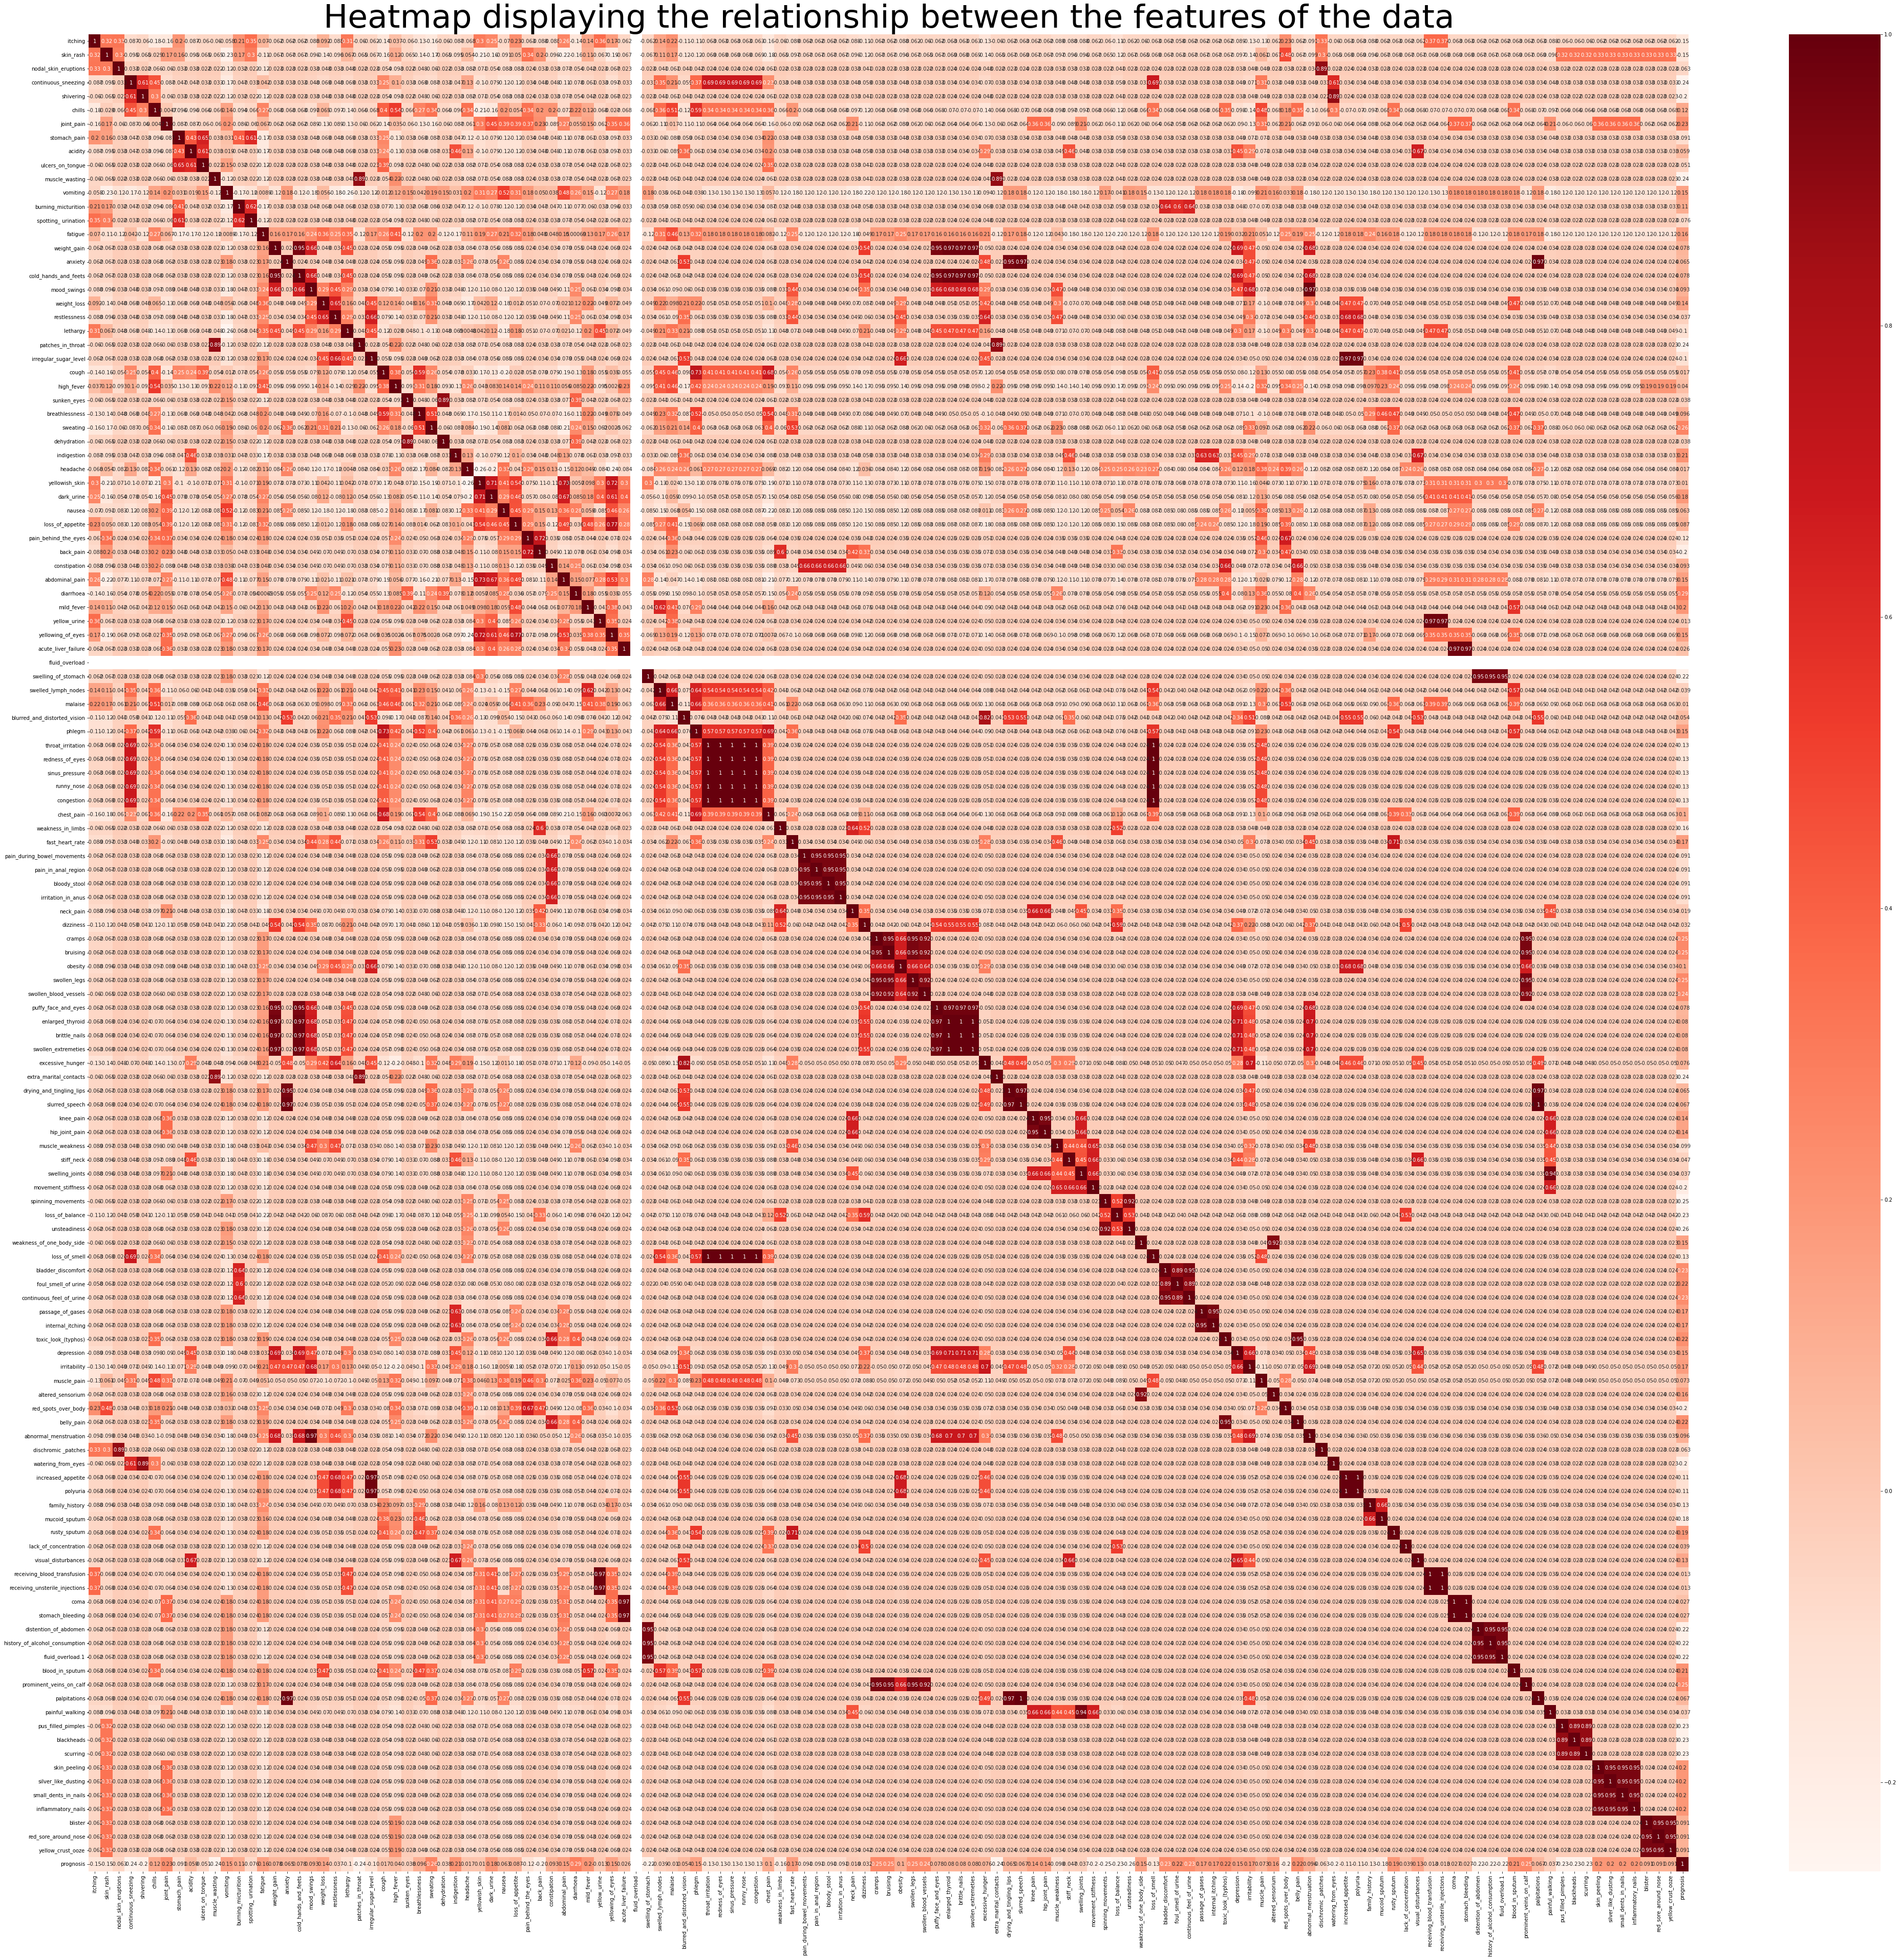

In [53]:
plt.figure(figsize=(70,66))
sns.heatmap(data_clean.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data',
         fontsize=63)
plt.show()

#### Conclusion: chills,vomiting,fatigue and mild_fever affects the prognosis more.

### Feature engineering

Feature engineering or feature extraction is the process of using domain knowledge to extract features (characteristics, properties, attributes) from raw data.

In [54]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [55]:
scaler=StandardScaler()
### fit vs fit_transform
df_scaled=scaler.fit_transform(data_clean)

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
df_scaled

array([[ 2.50132708,  2.29336913,  6.6749948 , ..., -0.15401412,
        -0.15401412, -0.42257713],
       [-0.39978778,  2.29336913,  6.6749948 , ..., -0.15401412,
        -0.15401412, -0.42257713],
       [ 2.50132708, -0.4360397 ,  6.6749948 , ..., -0.15401412,
        -0.15401412, -0.42257713],
       ...,
       [-0.39978778, -0.4360397 , -0.14981285, ..., -0.15401412,
        -0.15401412,  1.52127766],
       [-0.39978778,  2.29336913, -0.14981285, ..., -0.15401412,
        -0.15401412,  1.26773138],
       [-0.39978778,  2.29336913, -0.14981285, ...,  6.49291111,
         6.49291111,  0.59160798]])

### Plotting histogram:
A histogram is an approximate representation of the distribution of numerical data.

(array([4134.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  786.]),
 array([-0.4360397 , -0.29956926, -0.16309882, -0.02662838,  0.10984206,
         0.2463125 ,  0.38278295,  0.51925339,  0.65572383,  0.79219427,
         0.92866471,  1.06513516,  1.2016056 ,  1.33807604,  1.47454648,
         1.61101692,  1.74748737,  1.88395781,  2.02042825,  2.15689869,
         2.29336913]),
 <a list of 20 Patch objects>)

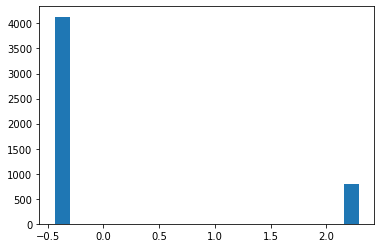

In [58]:
plt.hist(df_scaled[:,1],bins=20)

(array([4812.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  108.]),
 array([-0.14981285,  0.19142753,  0.53266791,  0.8739083 ,  1.21514868,
         1.55638906,  1.89762944,  2.23886983,  2.58011021,  2.92135059,
         3.26259097,  3.60383136,  3.94507174,  4.28631212,  4.6275525 ,
         4.96879289,  5.31003327,  5.65127365,  5.99251403,  6.33375442,
         6.6749948 ]),
 <a list of 20 Patch objects>)

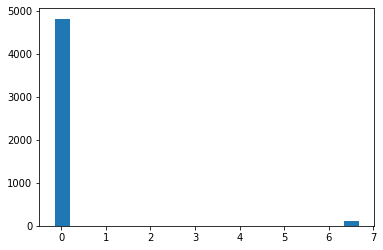

In [59]:
plt.hist(df_scaled[:,2],bins=20)

(array([4698.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  222.]),
 array([-0.2173802 ,  0.02350056,  0.26438132,  0.50526208,  0.74614284,
         0.9870236 ,  1.22790436,  1.46878513,  1.70966589,  1.95054665,
         2.19142741,  2.43230817,  2.67318893,  2.91406969,  3.15495045,
         3.39583121,  3.63671197,  3.87759273,  4.11847349,  4.35935425,
         4.60023501]),
 <a list of 20 Patch objects>)

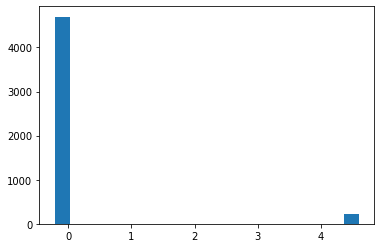

In [60]:
plt.hist(df_scaled[:,3],bins=20)

(array([4812.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  108.]),
 array([-0.14981285,  0.19142753,  0.53266791,  0.8739083 ,  1.21514868,
         1.55638906,  1.89762944,  2.23886983,  2.58011021,  2.92135059,
         3.26259097,  3.60383136,  3.94507174,  4.28631212,  4.6275525 ,
         4.96879289,  5.31003327,  5.65127365,  5.99251403,  6.33375442,
         6.6749948 ]),
 <a list of 20 Patch objects>)

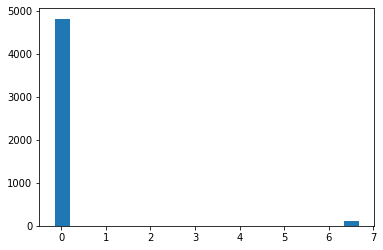

In [61]:
plt.hist(df_scaled[:,4],bins=20)

(array([4122.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  798.]),
 array([-0.43999471, -0.30435724, -0.16871977, -0.03308231,  0.10255516,
         0.23819262,  0.37383009,  0.50946756,  0.64510502,  0.78074249,
         0.91637995,  1.05201742,  1.18765489,  1.32329235,  1.45892982,
         1.59456728,  1.73020475,  1.86584222,  2.00147968,  2.13711715,
         2.27275461]),
 <a list of 20 Patch objects>)

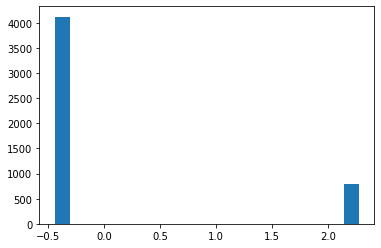

In [62]:
plt.hist(df_scaled[:,5],bins=20)


(array([4236.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  684.]),
 array([-0.40183714, -0.25731677, -0.11279639,  0.03172398,  0.17624436,
         0.32076474,  0.46528511,  0.60980549,  0.75432586,  0.89884624,
         1.04336661,  1.18788699,  1.33240736,  1.47692774,  1.62144811,
         1.76596849,  1.91048886,  2.05500924,  2.19952961,  2.34404999,
         2.48857036]),
 <a list of 20 Patch objects>)

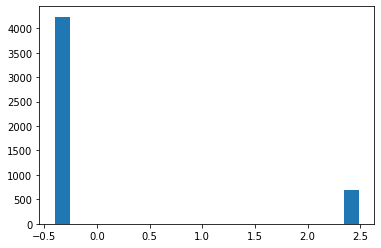

In [63]:
plt.hist(df_scaled[:,6],bins=20)

(array([4698.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  222.]),
 array([-0.2173802 ,  0.02350056,  0.26438132,  0.50526208,  0.74614284,
         0.9870236 ,  1.22790436,  1.46878513,  1.70966589,  1.95054665,
         2.19142741,  2.43230817,  2.67318893,  2.91406969,  3.15495045,
         3.39583121,  3.63671197,  3.87759273,  4.11847349,  4.35935425,
         4.60023501]),
 <a list of 20 Patch objects>)

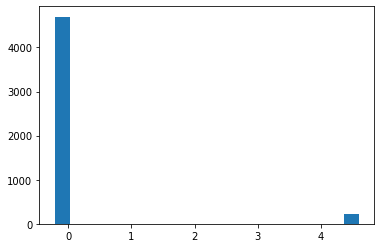

In [64]:
plt.hist(df_scaled[:,7],bins=20)

(array([4698.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  222.]),
 array([-0.2173802 ,  0.02350056,  0.26438132,  0.50526208,  0.74614284,
         0.9870236 ,  1.22790436,  1.46878513,  1.70966589,  1.95054665,
         2.19142741,  2.43230817,  2.67318893,  2.91406969,  3.15495045,
         3.39583121,  3.63671197,  3.87759273,  4.11847349,  4.35935425,
         4.60023501]),
 <a list of 20 Patch objects>)

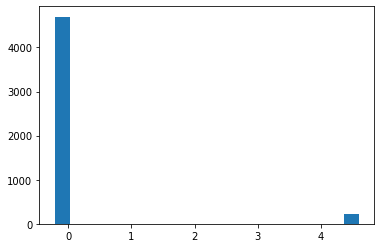

In [65]:
plt.hist(df_scaled[:,8],bins=20)

(array([4812.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  108.]),
 array([-0.14981285,  0.19142753,  0.53266791,  0.8739083 ,  1.21514868,
         1.55638906,  1.89762944,  2.23886983,  2.58011021,  2.92135059,
         3.26259097,  3.60383136,  3.94507174,  4.28631212,  4.6275525 ,
         4.96879289,  5.31003327,  5.65127365,  5.99251403,  6.33375442,
         6.6749948 ]),
 <a list of 20 Patch objects>)

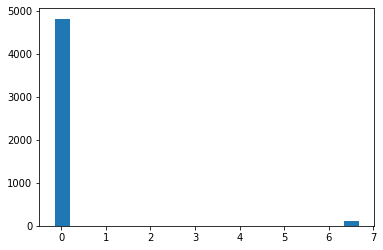

In [66]:
plt.hist(df_scaled[:,9],bins=20)

(array([4812.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  108.]),
 array([-0.14981285,  0.19142753,  0.53266791,  0.8739083 ,  1.21514868,
         1.55638906,  1.89762944,  2.23886983,  2.58011021,  2.92135059,
         3.26259097,  3.60383136,  3.94507174,  4.28631212,  4.6275525 ,
         4.96879289,  5.31003327,  5.65127365,  5.99251403,  6.33375442,
         6.6749948 ]),
 <a list of 20 Patch objects>)

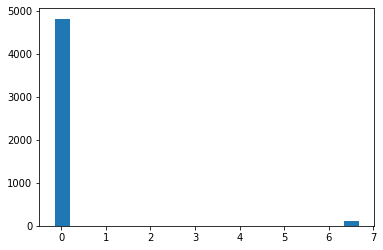

In [67]:
plt.hist(df_scaled[:,10],bins=20)

(array([3006.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 1914.]),
 array([-0.79795147, -0.69539344, -0.59283542, -0.49027739, -0.38771937,
        -0.28516134, -0.18260331, -0.08004529,  0.02251274,  0.12507076,
         0.22762879,  0.33018681,  0.43274484,  0.53530287,  0.63786089,
         0.74041892,  0.84297694,  0.94553497,  1.048093  ,  1.15065102,
         1.25320905]),
 <a list of 20 Patch objects>)

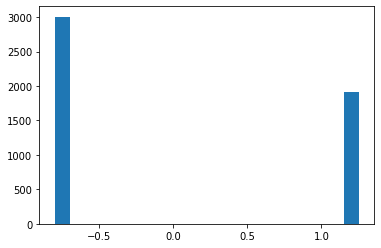

In [68]:
plt.hist(df_scaled[:,11],bins=20)

(array([4704.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  216.]),
 array([-0.21428571,  0.0297619 ,  0.27380952,  0.51785714,  0.76190476,
         1.00595238,  1.25      ,  1.49404762,  1.73809524,  1.98214286,
         2.22619048,  2.4702381 ,  2.71428571,  2.95833333,  3.20238095,
         3.44642857,  3.69047619,  3.93452381,  4.17857143,  4.42261905,
         4.66666667]),
 <a list of 20 Patch objects>)

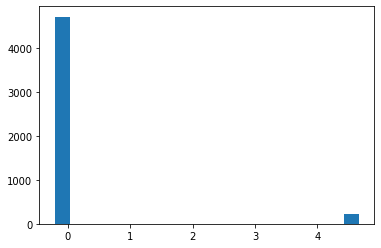

In [69]:
plt.hist(df_scaled[:,12],bins=20)

(array([4812.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  108.]),
 array([-0.14981285,  0.19142753,  0.53266791,  0.8739083 ,  1.21514868,
         1.55638906,  1.89762944,  2.23886983,  2.58011021,  2.92135059,
         3.26259097,  3.60383136,  3.94507174,  4.28631212,  4.6275525 ,
         4.96879289,  5.31003327,  5.65127365,  5.99251403,  6.33375442,
         6.6749948 ]),
 <a list of 20 Patch objects>)

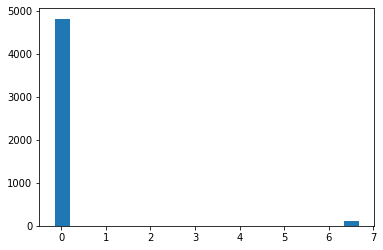

In [70]:
plt.hist(df_scaled[:,13],bins=20)

(array([2988.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 1932.]),
 array([-0.80410593, -0.70171977, -0.59933361, -0.49694745, -0.39456129,
        -0.29217514, -0.18978898, -0.08740282,  0.01498334,  0.1173695 ,
         0.21975566,  0.32214182,  0.42452798,  0.52691413,  0.62930029,
         0.73168645,  0.83407261,  0.93645877,  1.03884493,  1.14123109,
         1.24361724]),
 <a list of 20 Patch objects>)

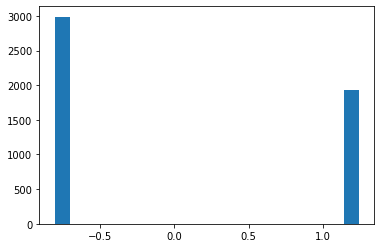

In [71]:
plt.hist(df_scaled[:,14],bins=20)

(array([4806.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  114.]),
 array([-0.15401412,  0.17833214,  0.5106784 ,  0.84302466,  1.17537093,
         1.50771719,  1.84006345,  2.17240971,  2.50475597,  2.83710223,
         3.1694485 ,  3.50179476,  3.83414102,  4.16648728,  4.49883354,
         4.83117981,  5.16352607,  5.49587233,  5.82821859,  6.16056485,
         6.49291111]),
 <a list of 20 Patch objects>)

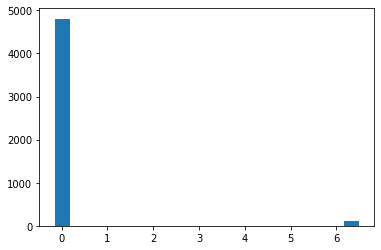

In [72]:
plt.hist(df_scaled[:,15],bins=20)

(array([4806.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  114.]),
 array([-0.15401412,  0.17833214,  0.5106784 ,  0.84302466,  1.17537093,
         1.50771719,  1.84006345,  2.17240971,  2.50475597,  2.83710223,
         3.1694485 ,  3.50179476,  3.83414102,  4.16648728,  4.49883354,
         4.83117981,  5.16352607,  5.49587233,  5.82821859,  6.16056485,
         6.49291111]),
 <a list of 20 Patch objects>)

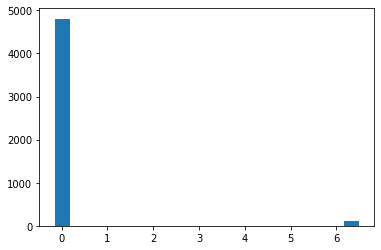

In [73]:
plt.hist(df_scaled[:,16],bins=20)

(array([4806.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  114.]),
 array([-0.15401412,  0.17833214,  0.5106784 ,  0.84302466,  1.17537093,
         1.50771719,  1.84006345,  2.17240971,  2.50475597,  2.83710223,
         3.1694485 ,  3.50179476,  3.83414102,  4.16648728,  4.49883354,
         4.83117981,  5.16352607,  5.49587233,  5.82821859,  6.16056485,
         6.49291111]),
 <a list of 20 Patch objects>)

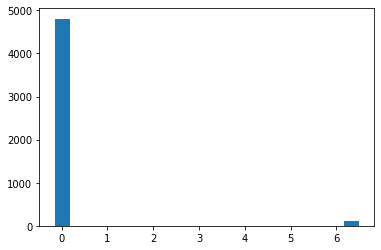

In [74]:
plt.hist(df_scaled[:,17],bins=20)

(array([4692.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  228.]),
 array([-0.22043899,  0.01740308,  0.25524515,  0.49308722,  0.7309293 ,
         0.96877137,  1.20661344,  1.44445552,  1.68229759,  1.92013966,
         2.15798174,  2.39582381,  2.63366588,  2.87150796,  3.10935003,
         3.3471921 ,  3.58503418,  3.82287625,  4.06071832,  4.2985604 ,
         4.53640247]),
 <a list of 20 Patch objects>)

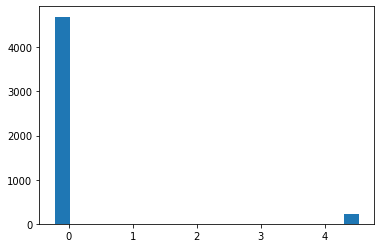

In [75]:
plt.hist(df_scaled[:,18],bins=20)

(array([4464.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  456.]),
 array([-0.31960998, -0.14718881,  0.02523237,  0.19765354,  0.37007471,
         0.54249588,  0.71491705,  0.88733823,  1.0597594 ,  1.23218057,
         1.40460174,  1.57702291,  1.74944409,  1.92186526,  2.09428643,
         2.2667076 ,  2.43912877,  2.61154995,  2.78397112,  2.95639229,
         3.12881346]),
 <a list of 20 Patch objects>)

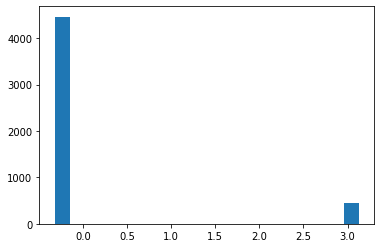

In [76]:
plt.hist(df_scaled[:,19],bins=20)

(array([4692.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  228.]),
 array([-0.22043899,  0.01740308,  0.25524515,  0.49308722,  0.7309293 ,
         0.96877137,  1.20661344,  1.44445552,  1.68229759,  1.92013966,
         2.15798174,  2.39582381,  2.63366588,  2.87150796,  3.10935003,
         3.3471921 ,  3.58503418,  3.82287625,  4.06071832,  4.2985604 ,
         4.53640247]),
 <a list of 20 Patch objects>)

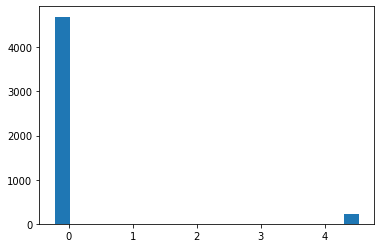

In [77]:
plt.hist(df_scaled[:,20],bins=20)

(array([4464.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  456.]),
 array([-0.31960998, -0.14718881,  0.02523237,  0.19765354,  0.37007471,
         0.54249588,  0.71491705,  0.88733823,  1.0597594 ,  1.23218057,
         1.40460174,  1.57702291,  1.74944409,  1.92186526,  2.09428643,
         2.2667076 ,  2.43912877,  2.61154995,  2.78397112,  2.95639229,
         3.12881346]),
 <a list of 20 Patch objects>)

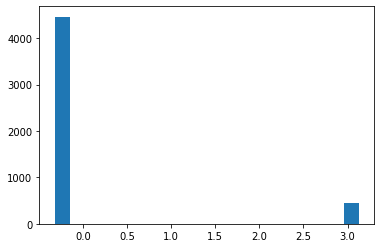

In [78]:
plt.hist(df_scaled[:,21],bins=20)

(array([4812.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  108.]),
 array([-0.14981285,  0.19142753,  0.53266791,  0.8739083 ,  1.21514868,
         1.55638906,  1.89762944,  2.23886983,  2.58011021,  2.92135059,
         3.26259097,  3.60383136,  3.94507174,  4.28631212,  4.6275525 ,
         4.96879289,  5.31003327,  5.65127365,  5.99251403,  6.33375442,
         6.6749948 ]),
 <a list of 20 Patch objects>)

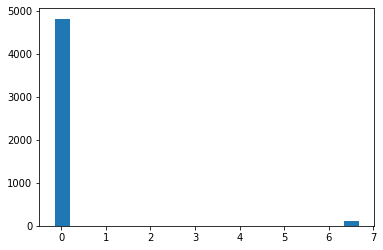

In [79]:
plt.hist(df_scaled[:,22],bins=20)

### Min Max Scaling (### CNN)Deep Learning Techniques
Min Max Scaling scales the values between 0 to 1. X_scaled = (X - X.min / (X.max - X.min)

In [80]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(data_clean),columns=df.columns)
df_minmax.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0      1.0        1.0                   1.0                  0.0        0.0   
1      0.0        1.0                   1.0                  0.0        0.0   
2      1.0        0.0                   1.0                  0.0        0.0   
3      1.0        1.0                   0.0                  0.0        0.0   
4      1.0        1.0                   1.0                  0.0        0.0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0     0.0         0.0           0.0      0.0               0.0  ...   
1     0.0         0.0           0.0      0.0               0.0  ...   
2     0.0         0.0           0.0      0.0               0.0  ...   
3     0.0         0.0           0.0      0.0               0.0  ...   
4     0.0         0.0           0.0      0.0               0.0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0         0.0       0.0           0.0                  0.0   
1         0.0       0.0           0.0                  0.0   
2         0.0       0.0           0.0                  0.0   
3         0.0       0.0           0.0                  0.0   
4         0.0       0.0           0.0                  0.0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                   0.0                 0.0      0.0                   0.0   
1                   0.0                 0.0      0.0                   0.0   
2                   0.0                 0.0      0.0                   0.0   
3                   0.0                 0.0      0.0                   0.0   
4                   0.0                 0.0      0.0                   0.0   

   yellow_crust_ooze  prognosis  
0                0.0      0.375  
1                0.0      0.375  
2                0.0      0.375  
3                0.0      0.375  
4                0.0      0.375  

[5 rows x 133 columns]

## Building a Model


In [81]:
data_clean.shape

(4920, 133)

In [82]:
X = data_clean.drop(['prognosis'],axis='columns')
X.head(3)

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0      1.0        1.0              0.461569                  0.0        0.0   
1      0.0        1.0              0.461569                  0.0        0.0   
2      1.0        0.0              0.461569                  0.0        0.0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0     0.0         0.0           0.0      0.0               0.0  ...   
1     0.0         0.0           0.0      0.0               0.0  ...   
2     0.0         0.0           0.0      0.0               0.0  ...   

   pus_filled_pimples  blackheads  scurring  skin_peeling  \
0                   0           0         0             0   
1                   0           0         0             0   
2                   0           0         0             0   

   silver_like_dusting  small_dents_in_nails  inflammatory_nails  blister  \
0                    0                     0                   0        0   
1                    0                     0                   0        0   
2                    0                     0                   0        0   

   red_sore_around_nose  yellow_crust_ooze  
0                     0                  0  
1                     0                  0  
2                     0                  0  

[3 rows x 132 columns]

In [83]:
y=data_clean.prognosis

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
cv = CountVectorizer()
clf = MultinomialNB()
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        25
           9       1.00      1.00      1.00        28
          10       1.00      1.00      1.00        19
          11       1.00      1.00      1.00        22
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        33
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        24
          17       1.00    

#Creating Model for Logistic Regression

In [86]:
# Normalize
x = (X - np.min(X)) / (np.max(X) - np.min(X)).values

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.datasets import make_blobs


In [88]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [91]:
model.fit(X_train, y_train)

LogisticRegression()

#Measure accuracy of our model

In [92]:
model.predict(X_test)

array([ 3, 33, 14, ...,  4, 19, 35])

In [93]:
model.score(X_test, y_test)

1.0

### Confusion Matrix

A confusion matrix, also known as an error matrix,is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix).

In [94]:
y_predicted = model.predict(X_test)

In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[23,  0,  0, ...,  0,  0,  0],
       [ 0, 40,  0, ...,  0,  0,  0],
       [ 0,  0, 47, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 27,  0,  0],
       [ 0,  0,  0, ...,  0, 46,  0],
       [ 0,  0,  0, ...,  0,  0, 36]])

Text(159.0, 0.5, 'Truth')

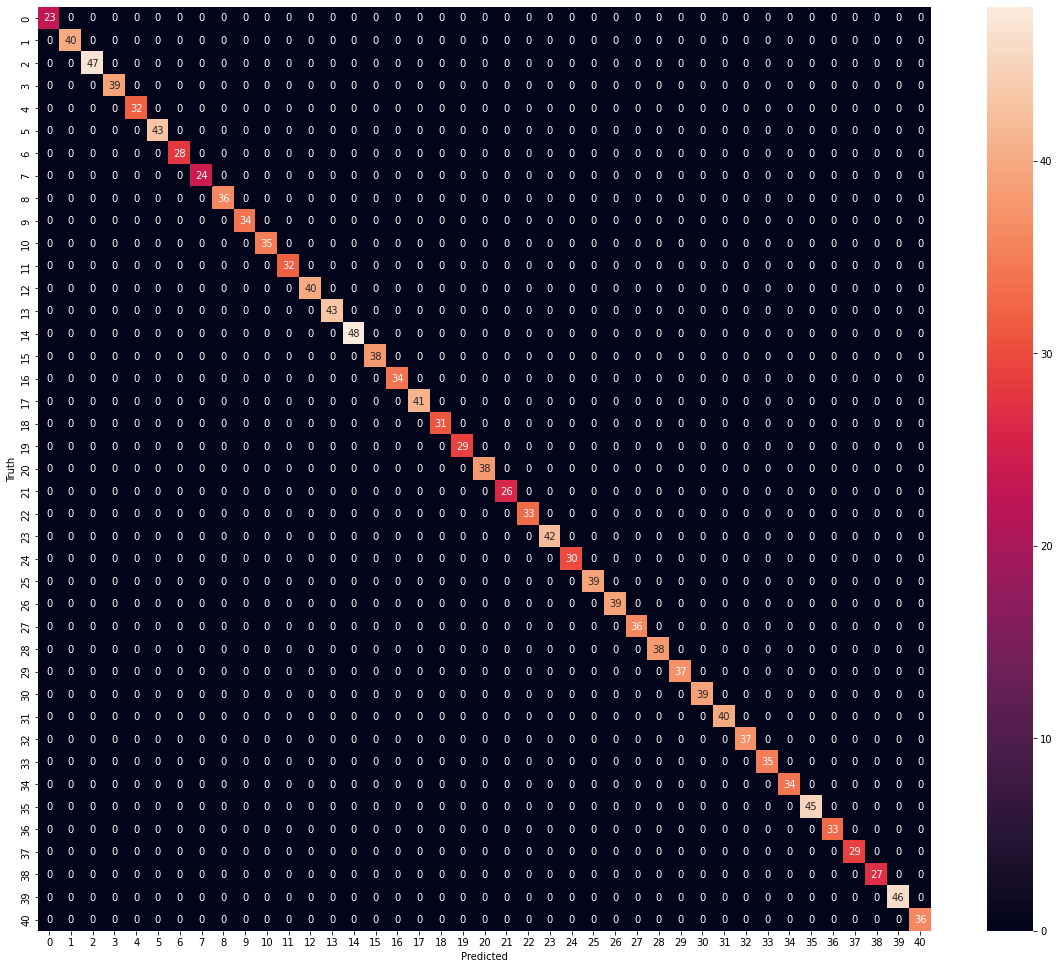

In [96]:
import seaborn as sn
plt.figure(figsize = (20,17))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

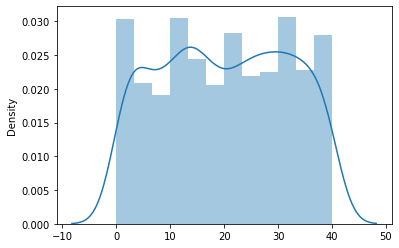

In [117]:
sns.distplot(y_predicted)

### summarize the fit of the model

In [99]:
from sklearn import metrics

In [100]:
print(metrics.classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        39
           4       1.00      1.00      1.00        32
           5       1.00      1.00      1.00        43
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        34
          10       1.00      1.00      1.00        35
          11       1.00      1.00      1.00        32
          12       1.00      1.00      1.00        40
          13       1.00      1.00      1.00        43
          14       1.00      1.00      1.00        48
          15       1.00      1.00      1.00        38
          16       1.00      1.00      1.00        34
          17       1.00    

In [101]:
print(metrics.confusion_matrix(y_test,y_predicted))

[[23  0  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  0]
 [ 0  0 47 ...  0  0  0]
 ...
 [ 0  0  0 ... 27  0  0]
 [ 0  0  0 ...  0 46  0]
 [ 0  0  0 ...  0  0 36]]


In [102]:
print("Accuracy: ",accuracy_score(y_test,y_predicted))
print("Precision: ",precision_score(y_test,y_predicted,average='macro'))
print("Recall: ",recall_score(y_test,y_predicted,average='macro'))
print("f1-score: ",f1_score(y_test,y_predicted,average='macro'))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
f1-score:  1.0


## Machine Learning Classification Algorithms:

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [104]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

k-fold cross validation: The goal of cross-validation is to estimate the expected level of fit of a model to a data set that is independent of the data that were used to train the model. It can be used to estimate any quantitative measure of fit that is appropriate for the data and model.

In [105]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {"SVC":SVC(),"Gaussian NB":GaussianNB(),"Random Forest":RandomForestClassifier(random_state=18),"KNN":KNeighborsClassifier(n_neighbors=3)}

# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10, n_jobs = -1, scoring = cv_scoring) 
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
KNN
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


SVM Classifier: Building binary classifiers that distinguish between one of the labels and the rest (one-versus-all) or between every pair of classes (one-versus-one). Classification of new instances for the one-versus-all case is done by a winner-takes-all strategy, in which the classifier with the highest-output function assigns the class (it is important that the output functions be calibrated to produce comparable scores). For the one-versus-one approach, classification is done by a max-wins voting strategy, in which every classifier assigns the instance to one of the two classes, then the vote for the assigned class is increased by one vote, and finally the class with the most votes determines the instance classification.

Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


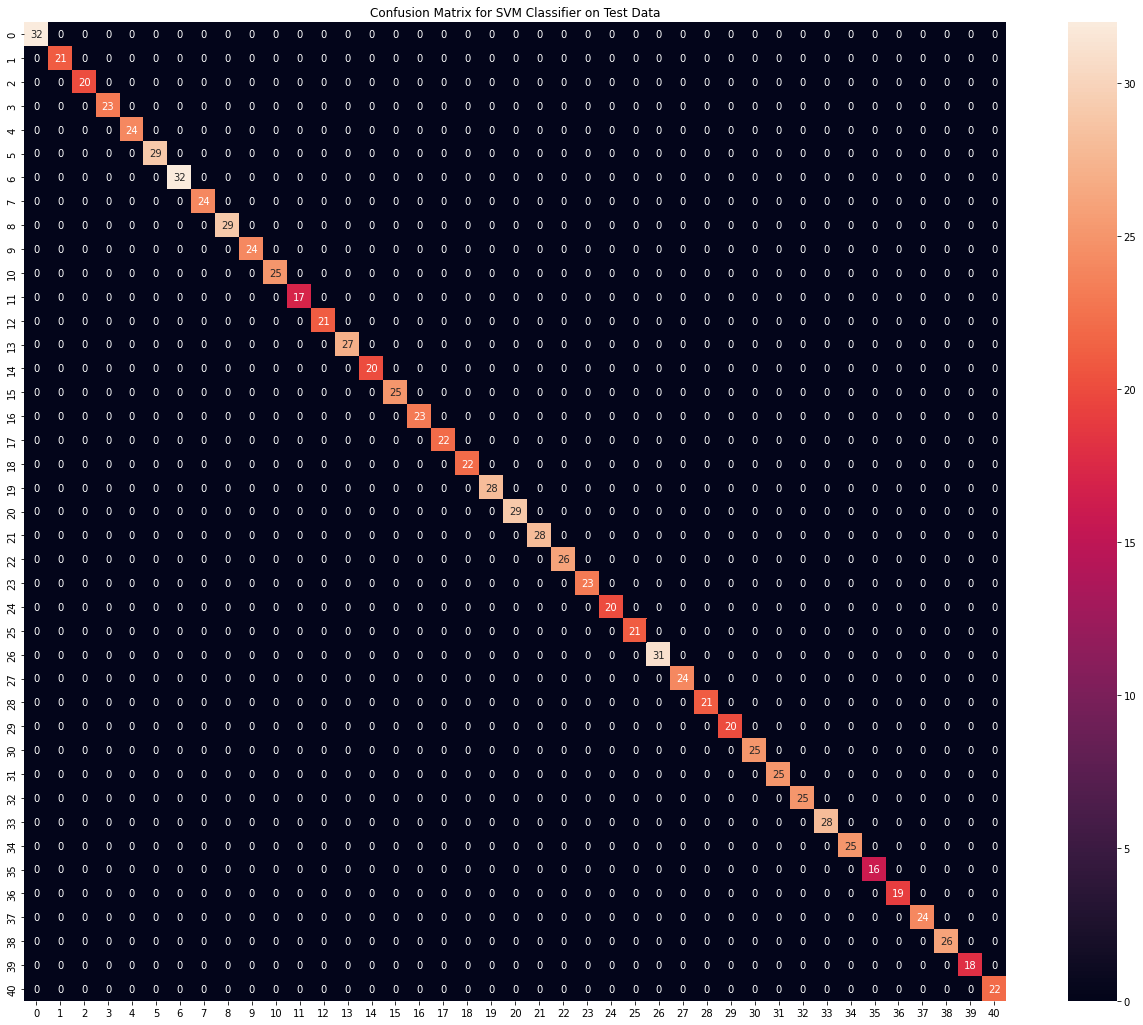

In [126]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds_svm = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds_svm)*100}")
cf_matrix = confusion_matrix(y_test, preds_svm)
plt.figure(figsize=(22,18))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()


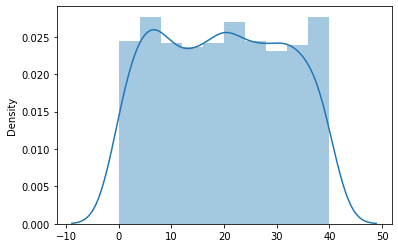

In [127]:
sns.distplot(preds_svm)

The naive Bayes classifier combines this model with a decision rule.Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set.

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


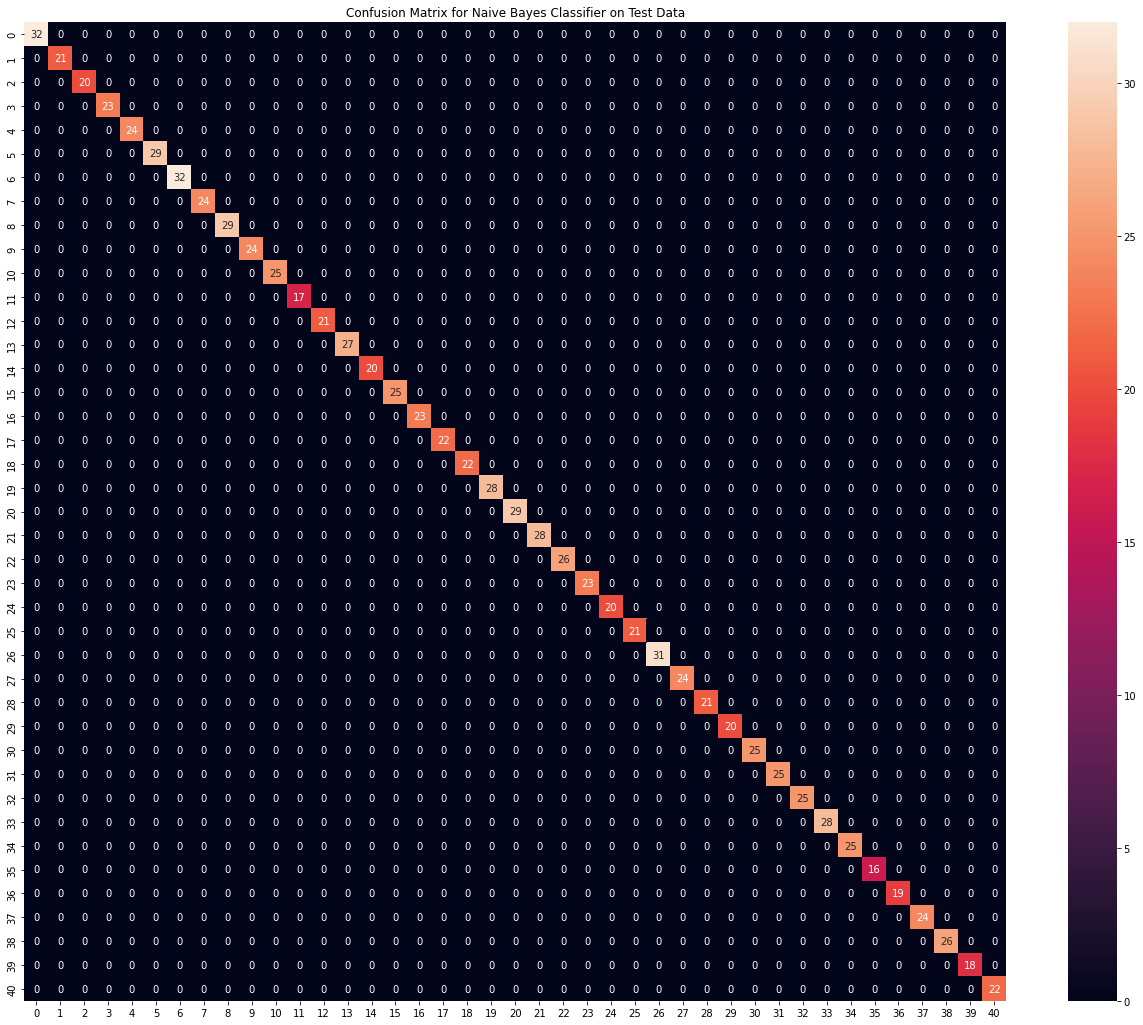

In [128]:
# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds_nb = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds_nb)*100}")
cf_matrix = confusion_matrix(y_test, preds_nb)
plt.figure(figsize=(22,18))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

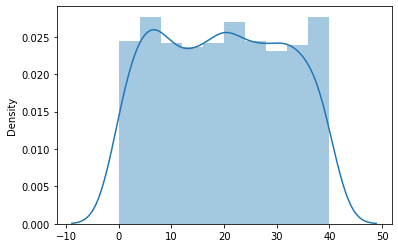

In [129]:
sns.distplot(preds_nb)

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned.

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


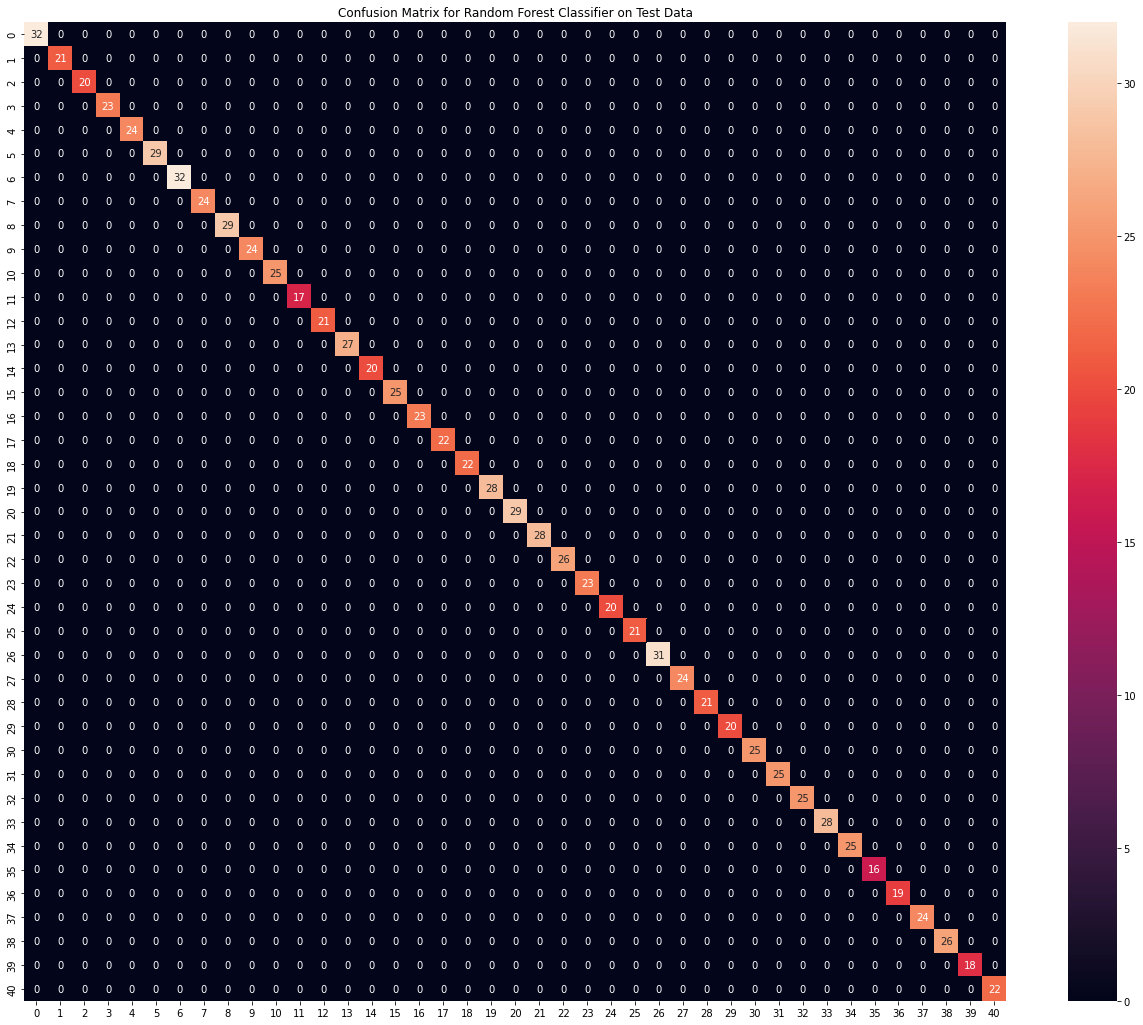

In [130]:
# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds_rf = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds_rf)*100}")

cf_matrix = confusion_matrix(y_test, preds_rf)
plt.figure(figsize=(22,18))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

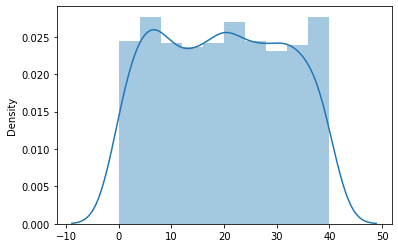

In [131]:
sns.distplot(preds_rf)

In k-NN regression, the k-NN algorithm is used for estimating continuous variables. The algorithm uses a weighted average of the k nearest neighbors, weighted by the inverse of their distance

Accuracy score for KNN is 100.0%


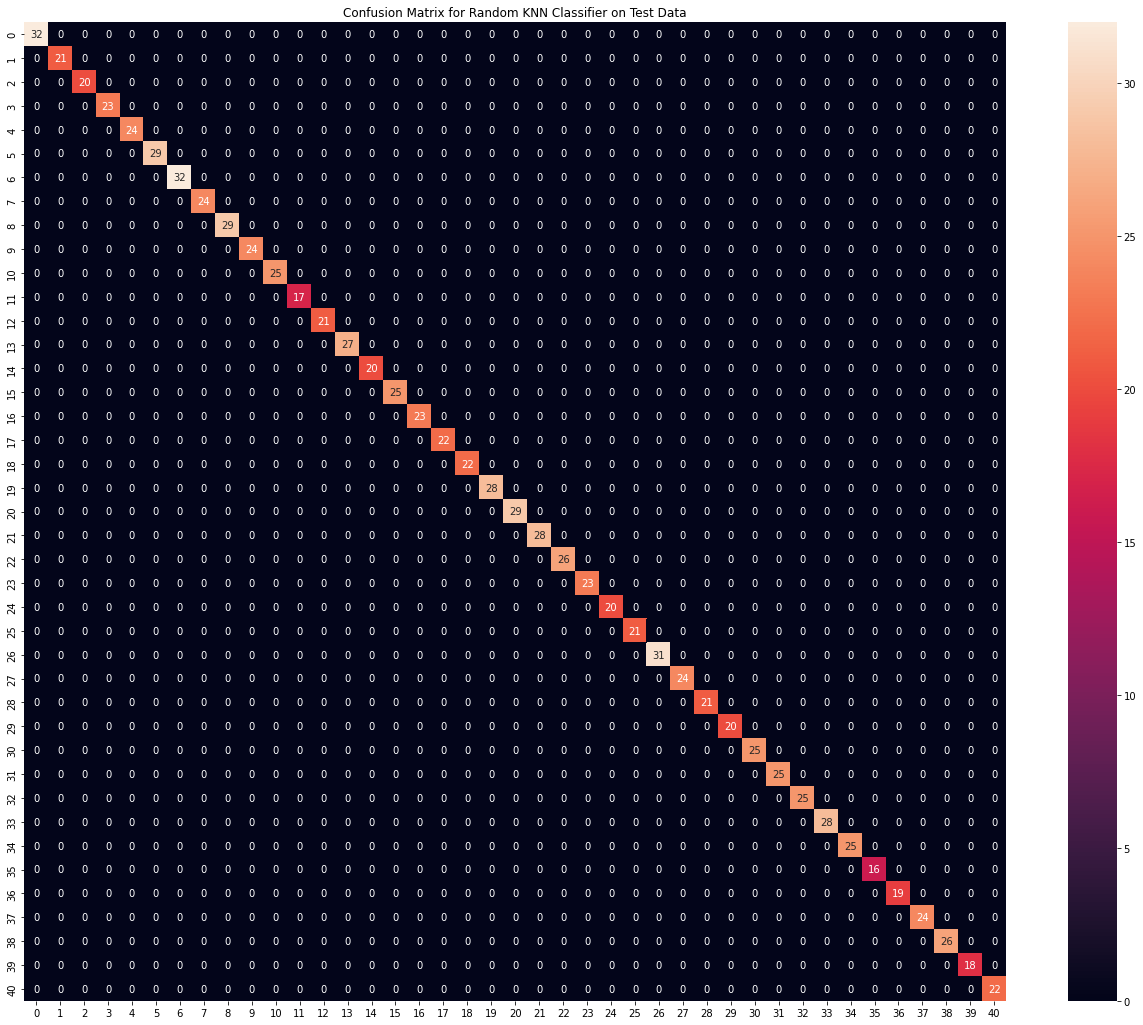

In [132]:
# Training and testing KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
preds_knn =knn_model.predict(X_test)
score = accuracy_score(y_test, preds_knn)
print("Accuracy score for KNN is {}%".format(score*100))
cf_matrix = confusion_matrix(y_test, preds_knn)
plt.figure(figsize=(22,18))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random KNN Classifier on Test Data")
plt.show()

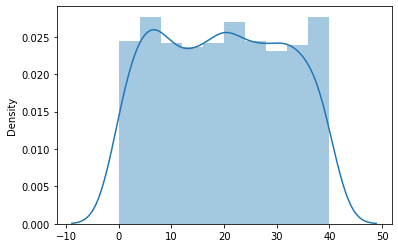

In [133]:
sns.distplot(preds_knn)

## COMPARING ACURACY OF ALL THE ALGORITHMS - LOGISTIC REGRESSION, KNN, SVM, NAIVE BAYES AND RANDOM FOREST



--------------
1. Logistic Regression: 100% accuracy
2. KNN: 100% accuracy
3. SVM: 100% accuracy
4. Naive bayes: 100% accuracy
5.Random forest: 100% accuracy

From the above observation all the algorithms give 100% accuracy

# PROJECT OUTCOME

* The main aim of this project is to predict the disease on the basis of 
symptoms given by the user.  
* The model is trained with the dataset having all the symptoms and respective diseases.
*  In this project we have used ML models like  Logistic Regression, K-fold cross validation technique, SVM, Naive bayes and Random forest.
*  Based on the training and testing outcome we observed that all the algorithms used provides 100% accuracy.

